# Running Power and Race Time Prediction

Jack Miller

April 5, 2023

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Running Power Model

- A running power model is used to calculate the power required to run a pace on a given course

Most equations taken from:

- Van Dijk, H., & Van Megan, R. (2017). The Secret of Running. Meyer & Meyer Sport.

In [2]:
import matplotlib.pyplot as plt
import sys
import os
module_path = os.path.abspath(os.path.join('../source'))
if module_path not in sys.path:
    sys.path.append(module_path)
import numpy as np
import bonk
plotSize = (12,8)

athlete = bonk.Athlete()
environment = bonk.Environment()

### Power to Maintain Constant Velocity on Flat Ground
$$    {P_{base}} = {c}{m}{v}    $$

where ${c}$ = energy cost of running (Ecor)

${v}$ = running speed, ${m}$ is mass

### Energy Cost of Running

- Ecor varies slightly from runner to runner and represents the velocity independent energy required to travel a certain distance per unit mass. Ecor is closely related to the term "running economy"

- In standard conditions, Ecor ranges +/- a few percent, with a typical value of 0.98 kj/km/kg. It can be measured in a lab.

- Ecor lumps together many hard to measure elements like internal work and the fraction energy recovery due to spring action of tendons.

- Future improvements to the model should include a model of Ecor. For now Ecor is scaled with gravity to account for the fact that the majority of Ecor comes from center of mass vertical motion (changing gravitational potential energy).

### Power due to Aerodynamic Drag
$$    {P_{drag}} = {\frac{1}{2}}{\rho}{C_{d}}{A}{(v+v_{wind})}^2{v}    $$

where ${v_{wind}}$ is headwind speed (negative values are tailwind)

${\rho}$ is air density
${C_{d}}$ is drag coefficient
${A}$ is frontal area



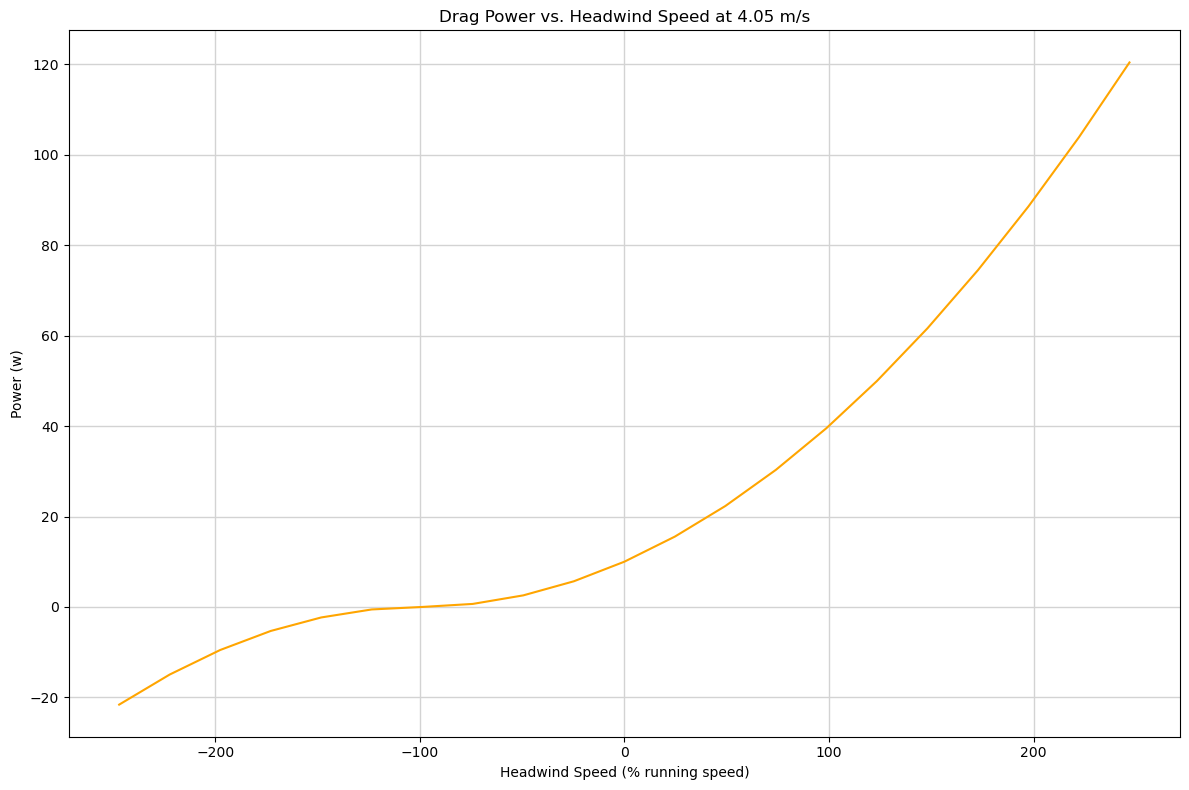

In [3]:
bonk.plotDragPower(environment, athlete, 4.05)

### Power due to Slope

$$    {P_{slope}} = {{m}{g}{s}{\eta}{v}}    $$

${m}$ is mass, ${g}$ is acceleration due to gravity, ${s}$ is slope

${\eta}$ is hill factor, ${v}$ is running speed

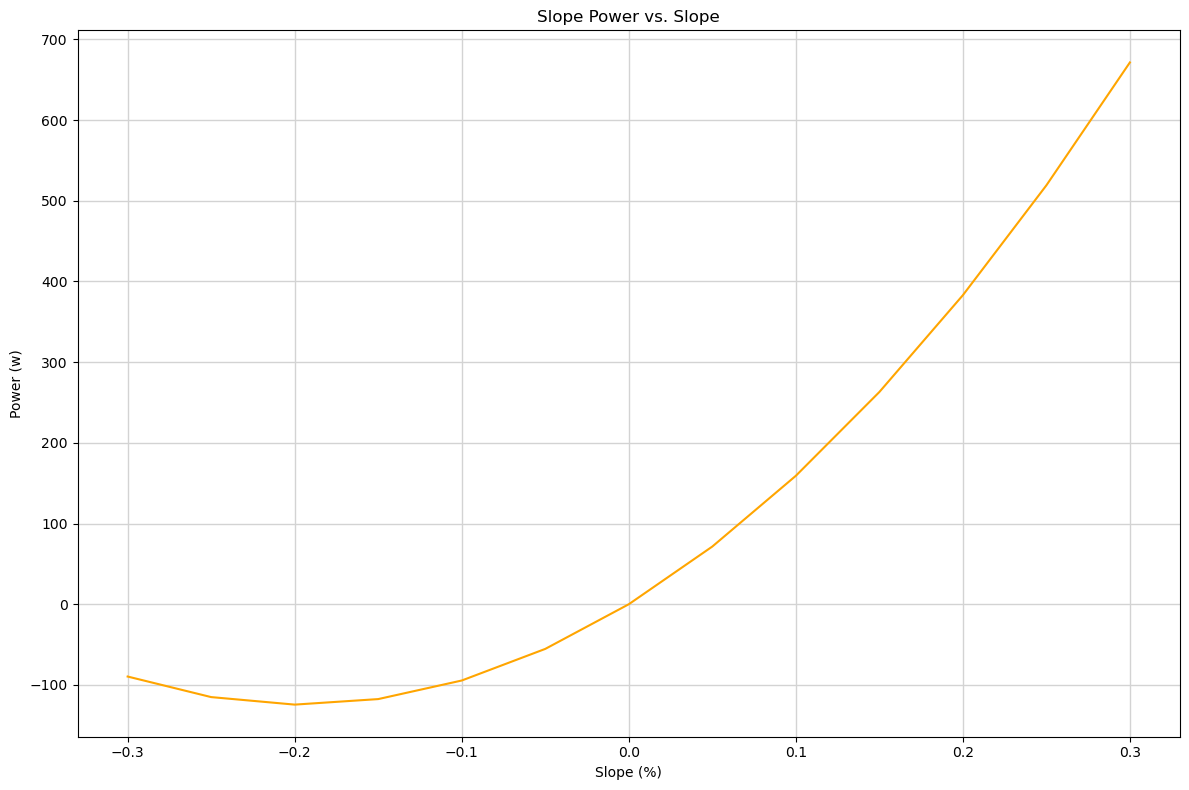

In [4]:
bonk.plotSlopePower(environment, athlete, 4.05)



#### Hill Factor

- Slope power is lower than expected due to differences in muscular efficiency
    - Muscle efficiency is higher during climbing than descending
    - At extreme negative slopes power is consumed due to braking

$$ {\eta} = \frac{P_{real}}{P_{theory}}{100} $$


$$ {\eta} = {45.6}+{1.1622}{s} $$

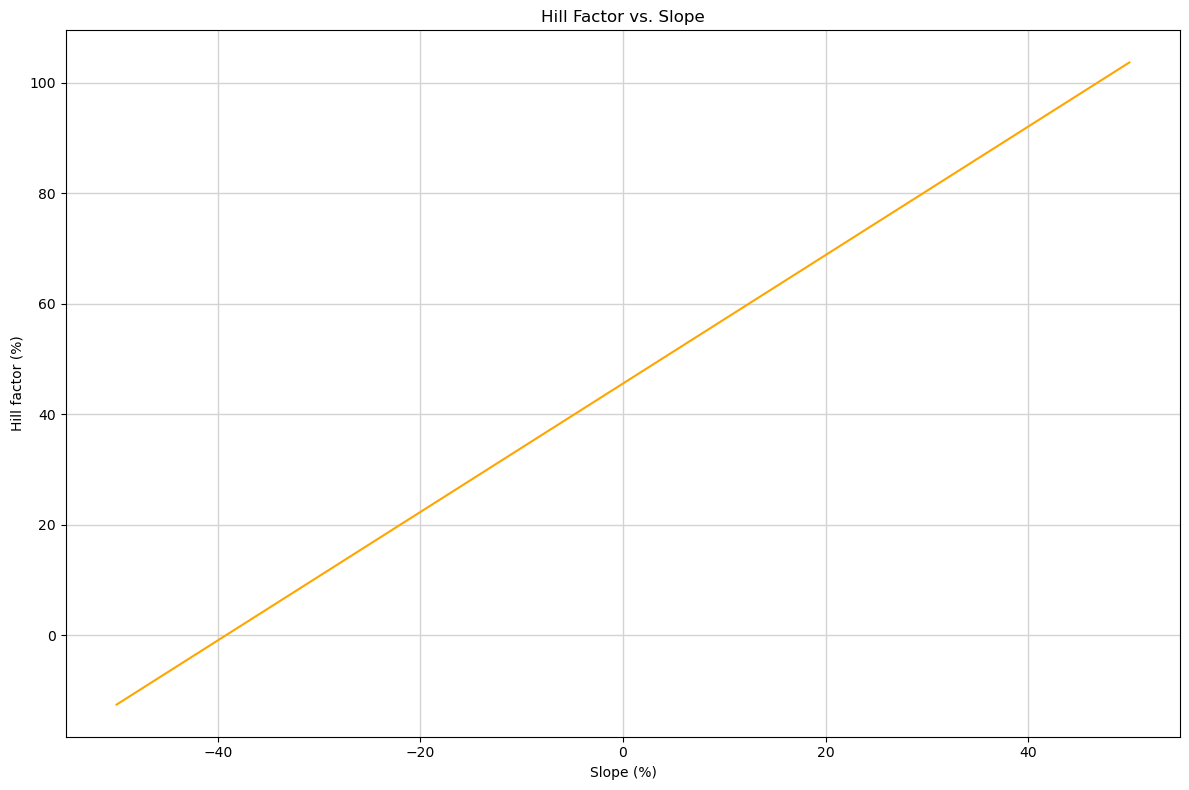

In [5]:
slope = np.arange(-50,55,10)
eta = 1.1622*slope+45.6

fig1, ax1 = plt.subplots(figsize=plotSize)
ax1.plot(slope,eta,color='orange')
ax1.set_title('Hill Factor vs. Slope')
ax1.set_xlabel('Slope (%)')
ax1.set_ylabel('Hill factor (%)')
ax1.grid(color='lightgrey', linestyle='-', linewidth=1)
fig1.tight_layout()

### Total Power

$$  {P_{total}} = {P_{base}+P_{drag}+P_{slope}}$$

$$ {P_{total}} = {c}{m}{v} + {\frac{1}{2}}{\rho}{C_{d}}{A}{(v+v_{wind})}^2{v} + {{m}{g}{s}{\eta}{v}} $$

### Solving for V

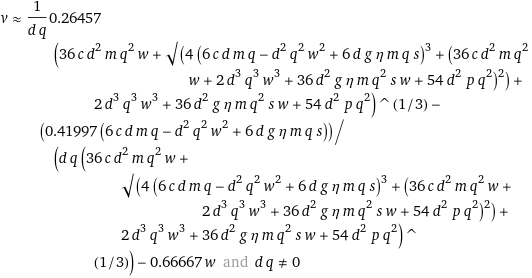

${c}$ is Ecor, ${m}$ is mass, ${d}$ is air density

${q}$ is CdA, ${p}$ is power, ${s}$ is slope

${g}$ is acceleration due to gravity, ${v}$ is running speed, ${w}$ is headwind velocity

${\eta}$ is slope efficiency


## Runner Capability Model

- To determine the time a runner can achieve on a race course, a model of their capability is required.

- Here a semi-empirical model of power vs. duration is used.

- The model is grounded in energy systems utilized during running, energy storage, energy intake, and the requirement for sleep.

### Metabolic Power of Fat and Glucose Oxidation

- Fat and glucose are utilized during aerobic exercise. 
    - Here anaerobic contributions are ignored
- The power contributions of fat and glucose vary with exercise intensity
- Conversion of this power to mechanical power is ~25% efficient

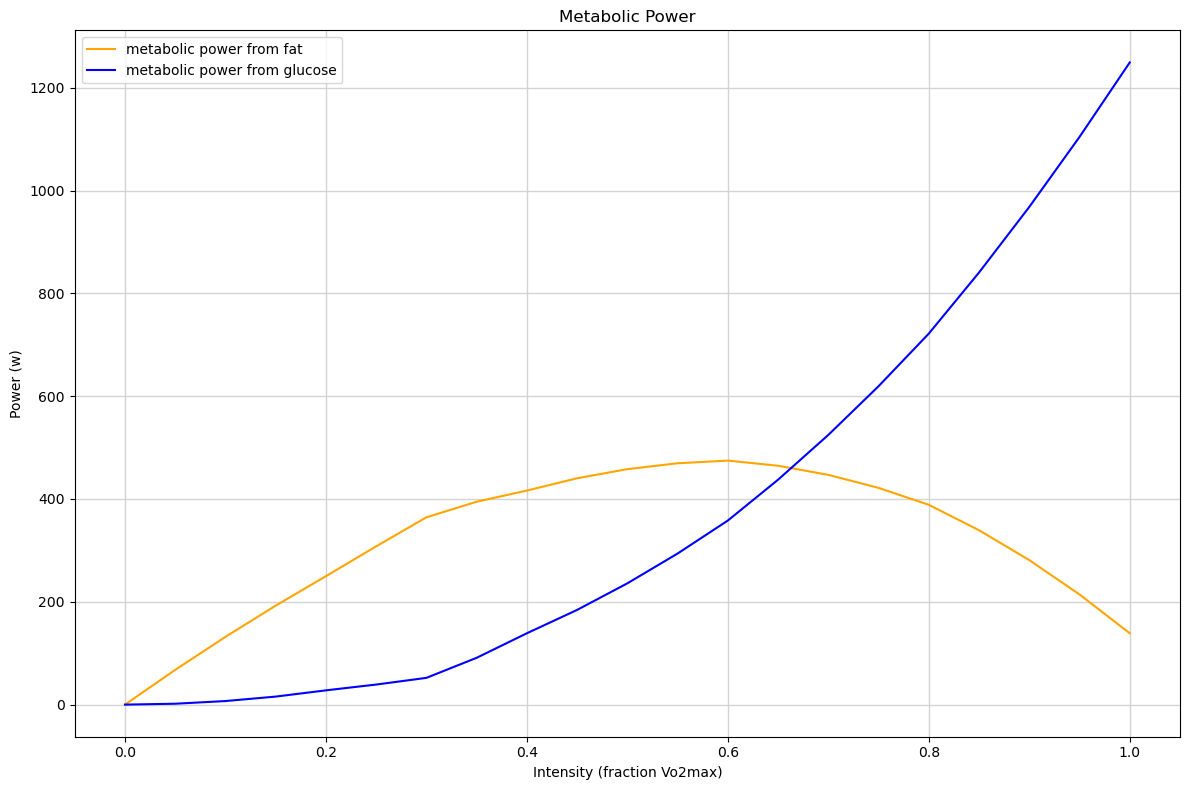

In [6]:
fig1, ax1 = plt.subplots(figsize=plotSize)
ax1.plot(athlete.powerDuration.fractionVo2,athlete.powerDuration.metabolicPowerFat,color='orange',label='metabolic power from fat')
ax1.plot(athlete.powerDuration.fractionVo2,athlete.powerDuration.metabolicPowerGlucose,color='blue',label='metabolic power from glucose')
ax1.legend()
ax1.set_title('Metabolic Power')
ax1.set_xlabel('Intensity (fraction Vo2max)')
ax1.set_ylabel('Power (w)')
ax1.grid(color='lightgrey', linestyle='-', linewidth=1)
fig1.tight_layout()

### Power - Duration Relationship

- Sustainable power decreases with increasing exercise duration
    - limiting factors include
        - max muscular power output during specific exercise
        - oxygen uptake
        - glycogen stores
        - glucose intake during exercise
        - water intake during exercise
        - hydration level at start of exercise
        - temperature and humidity
        - sleep
        - muscle fatigue
        - injury

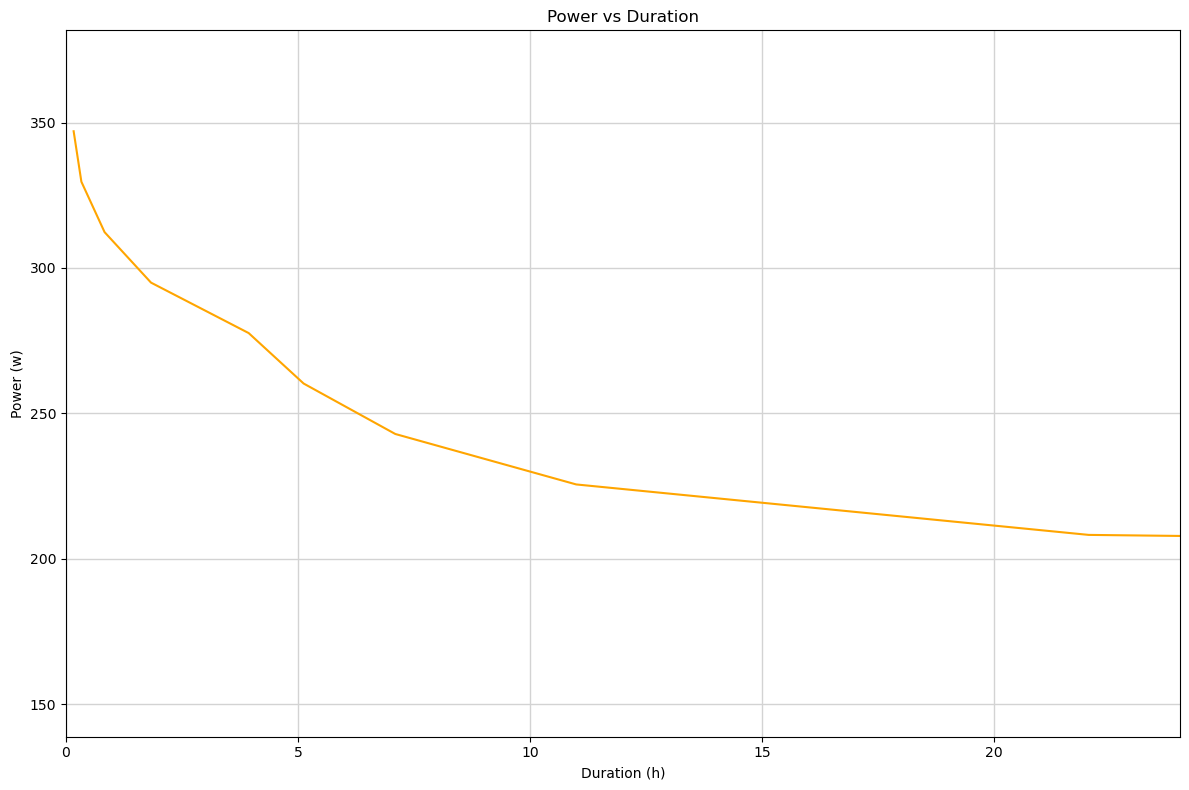

In [7]:
athlete = bonk.Athlete()
athlete.powerDuration.plotPowerDuration()

#### Glycogen Storage

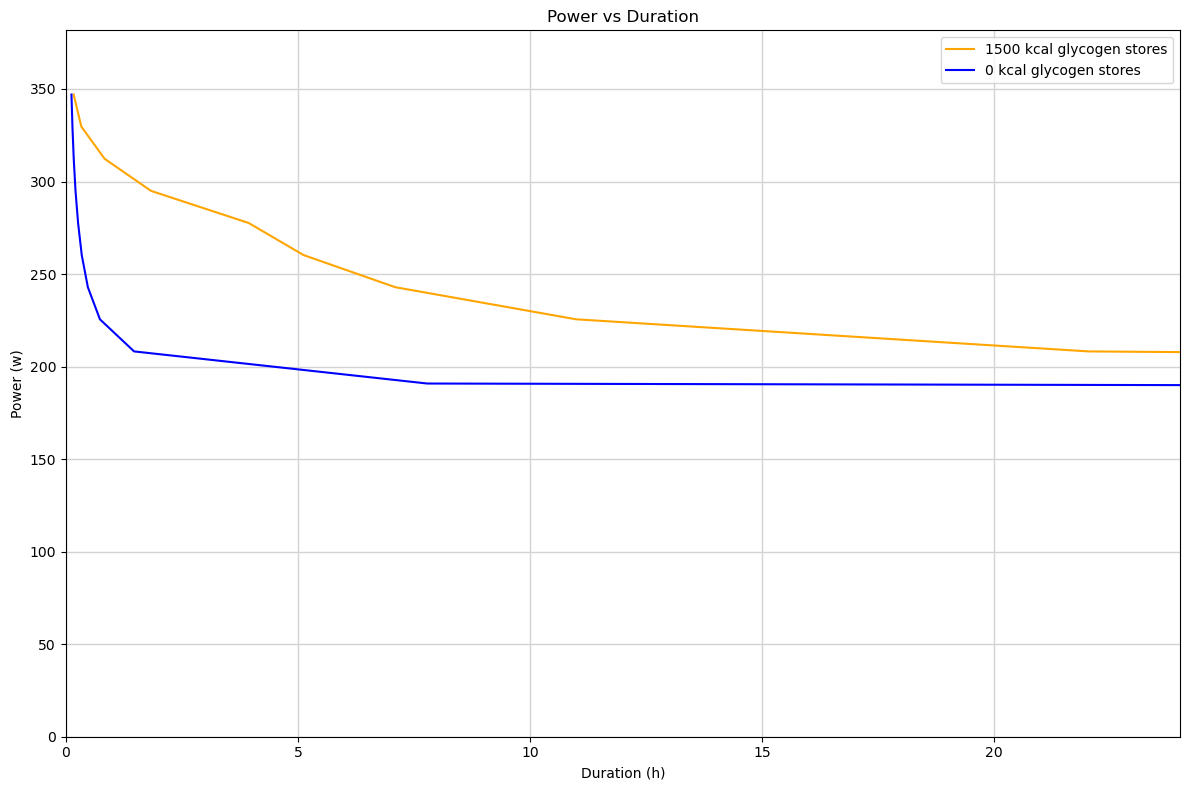

In [8]:
hungryRunner = bonk.Athlete(startingGlycogen=100)

fig1, ax1 = plt.subplots(figsize=plotSize)
ax1.plot(athlete.powerDuration.duration/3600,athlete.powerDuration.power,color='orange',label='1500 kcal glycogen stores')
ax1.plot(hungryRunner.powerDuration.duration/3600,hungryRunner.powerDuration.power,color='blue',label='0 kcal glycogen stores')
ax1.legend()
ax1.set_title('Power vs Duration')
ax1.set_xlabel('Duration (h)')
ax1.set_ylabel('Power (w)')
ax1.set_xlim(xmin=0,xmax=24)
ax1.set_ylim(ymin=athlete.vo2maxPower*0,ymax=athlete.vo2maxPower*1.1)
ax1.grid(color='lightgrey', linestyle='-', linewidth=1)
fig1.tight_layout()

#### Glucose Intake

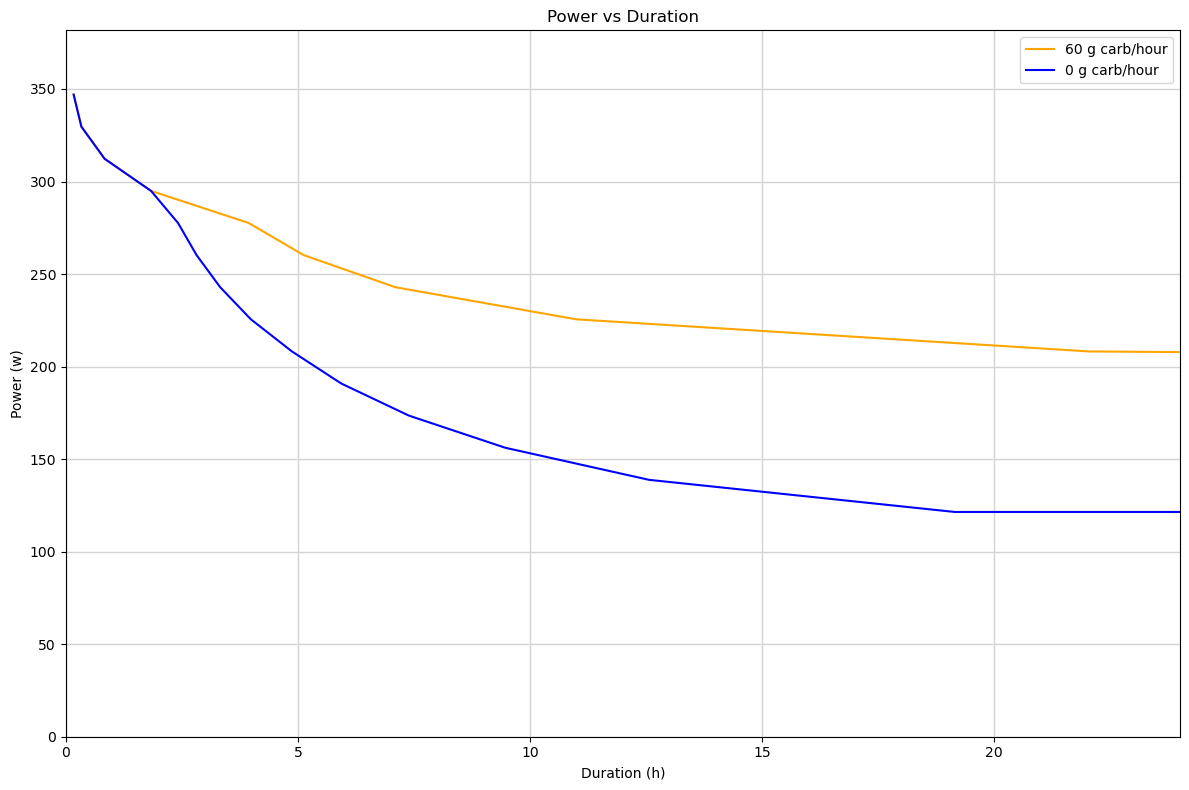

In [9]:
hungryRunner = bonk.Athlete(startingGlycogen=1500,glucoseConsumption = 0)

fig1, ax1 = plt.subplots(figsize=plotSize)
ax1.plot(athlete.powerDuration.duration/3600,athlete.powerDuration.power,color='orange',label='60 g carb/hour')
ax1.plot(hungryRunner.powerDuration.duration/3600,hungryRunner.powerDuration.power,color='blue',label='0 g carb/hour')
ax1.legend()
ax1.set_title('Power vs Duration')
ax1.set_xlabel('Duration (h)')
ax1.set_ylabel('Power (w)')
ax1.set_xlim(xmin=0,xmax=24)
ax1.set_ylim(ymin=athlete.vo2maxPower*0,ymax=athlete.vo2maxPower*1.1)
ax1.grid(color='lightgrey', linestyle='-', linewidth=1)
fig1.tight_layout()

#### Temperature and Humidity

- Optimal temperature range for marathon is ~ 5 deg C
- A good model for the effect on power - duration is lacking

Insert plot of temperature impact on marthon time

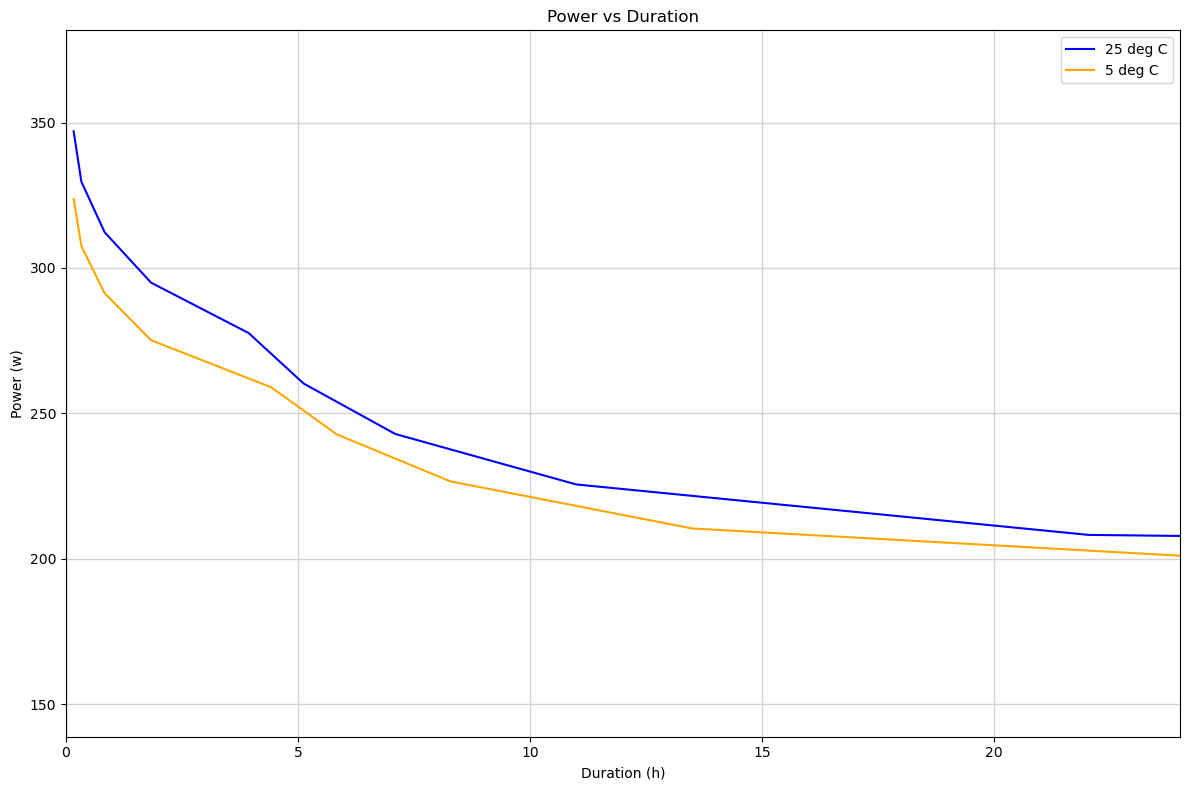

In [10]:
hotAthlete = bonk.Athlete(temp=25)
fig1, ax1 = plt.subplots(figsize=plotSize)
ax1.plot(athlete.powerDuration.duration/3600,athlete.powerDuration.power,color='blue', label = '25 deg C')
ax1.plot(hotAthlete.powerDuration.duration/3600,hotAthlete.powerDuration.power,color='orange',label='5 deg C')
ax1.set_title('Power vs Duration')
ax1.set_xlabel('Duration (h)')
ax1.set_ylabel('Power (w)')
ax1.legend()
ax1.set_xlim(xmin=0,xmax=24)
ax1.set_ylim(ymin=athlete.powerDuration.vo2maxPower*0.4,ymax=athlete.powerDuration.vo2maxPower*1.1)
ax1.grid(color='lightgrey', linestyle='-', linewidth=1)
fig1.tight_layout()

#### Altitude

The effect of altitude is to reduce the power output and is modeled here as a simple scaling of the full power - duration curve.

The effect is expected to be full at high power output and lower at lower power outputs, but is modeled as duration independent.

The model also assumes the athlete is acclimated to the race altitude.

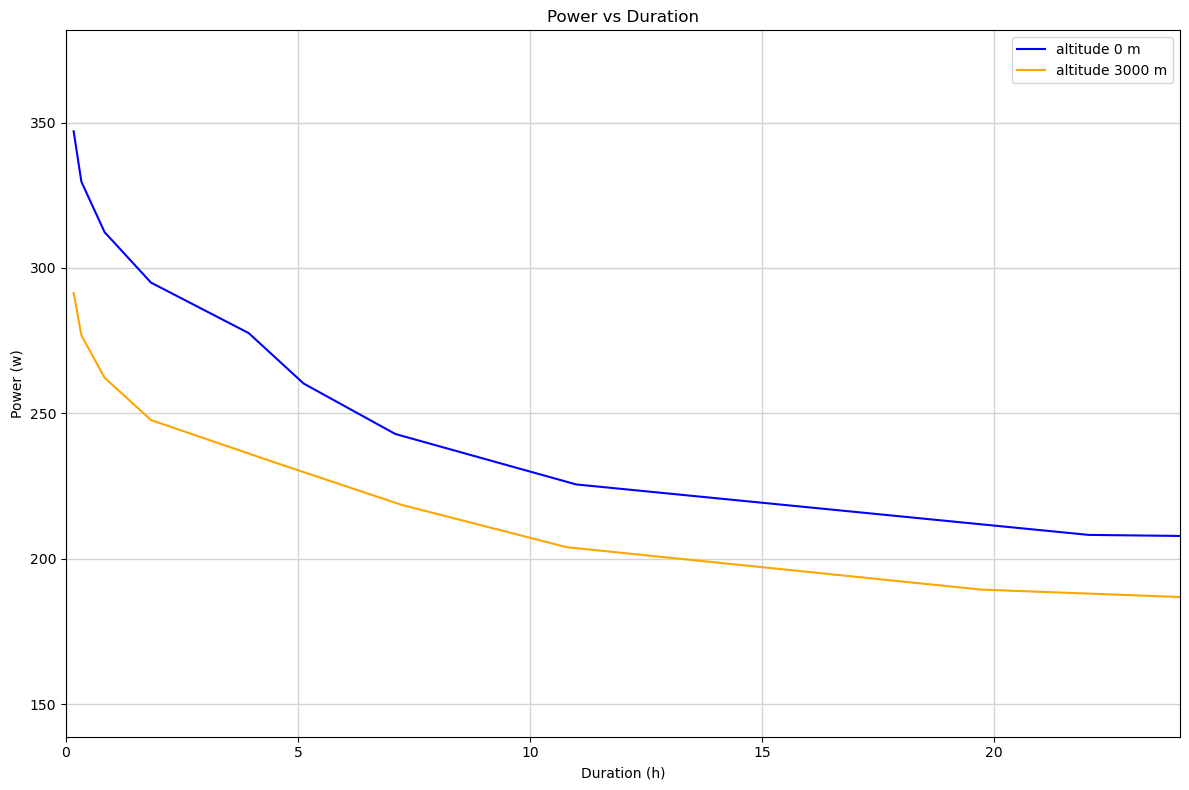

In [11]:
highAthlete = bonk.Athlete(altitude = 3000)
fig1, ax1 = plt.subplots(figsize=plotSize)
ax1.plot(athlete.powerDuration.duration/3600,athlete.powerDuration.power,color='blue', label = 'altitude 0 m')
ax1.plot(highAthlete.powerDuration.duration/3600,highAthlete.powerDuration.power,color='orange',label='altitude 3000 m')
ax1.set_title('Power vs Duration')
ax1.set_xlabel('Duration (h)')
ax1.set_ylabel('Power (w)')
ax1.legend()
ax1.set_xlim(xmin=0,xmax=24)
ax1.set_ylim(ymin=athlete.powerDuration.vo2maxPower*0.4,ymax=athlete.powerDuration.vo2maxPower*1.1)
ax1.grid(color='lightgrey', linestyle='-', linewidth=1)
fig1.tight_layout()

## Race Time Estimation

### Even power or even pace?

Two main pacing strategies are investigated
- Even power -> constant power is used in each segment
    - Commonly recommended in cycling due to availability of power meters
    - Low variability index (normalized power divided by average power) is touted as ideal
- Even pace -> constant speed is used in each segment
    - Commonly used during running due to simplicity

### Normalized Power

Normalized Power is a metric that attempts to account for fatigue differences between efforts of the same average power

Example: 
- 400w for 1 min, 0w for 1 min
    - average power 200w
    - high fatigue
- 200w for 2 min
    - average power 200w
    - low fatigue
    
It is commonly used in cycling, but solid evidence is lacking

In [12]:
powers = np.asarray([400,0])
times = np.asarray([1.0,1.0])
weights = times/sum(times)
powersRaised = np.power(powers,4)
powersRaisedAvg = np.average(powersRaised,weights=weights)
normPower = powersRaisedAvg**0.25
print('Normalized Power 400w - 0w:',normPower)
print('Normalized Power 200w - 200w:',200)


Normalized Power 400w - 0w: 336.3585661014858
Normalized Power 200w - 200w: 200


### Even Pace

- Choose a speed
- Calculate power per segment
- Calculate normalized power
- Calculate limit duration for that power from power-duration curve
- If estimated race time is longer than limit duration + tolerance
    - decrease speed estimate and repeat
- If estimated race time is shorter than limit duration - tolerance
    - increase speed estimate and repeat
- else: return speed

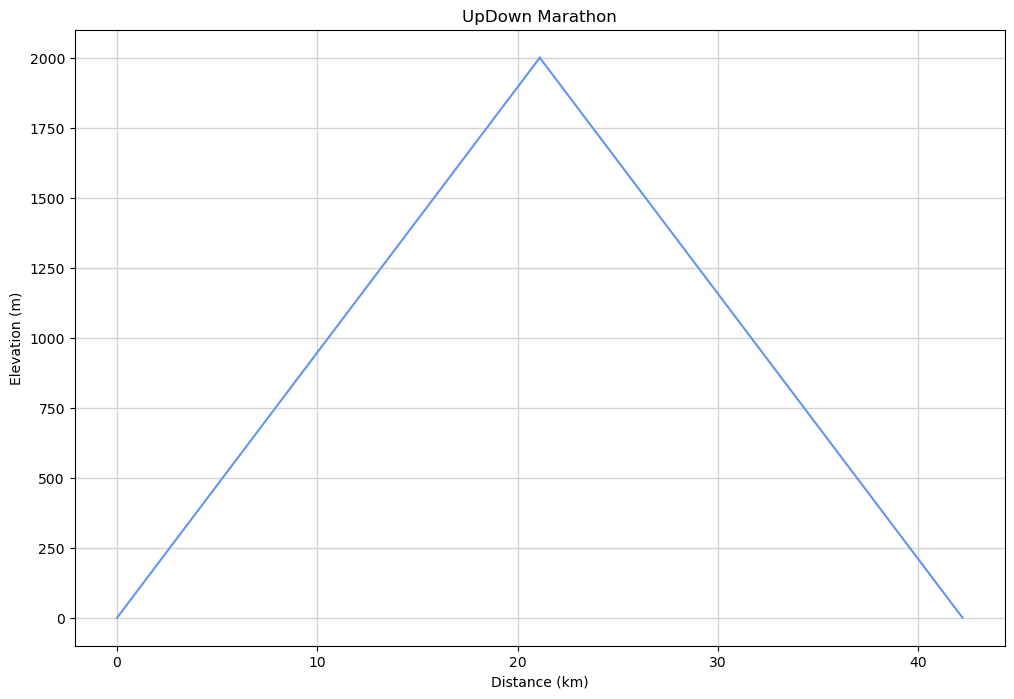

In [13]:
testCourse = bonk.readCourse('marathonUpDown.csv','UpDown Marathon')
testCourse.plotProfile()

Race time: 03:28:31
normalized power: 281.323028873372


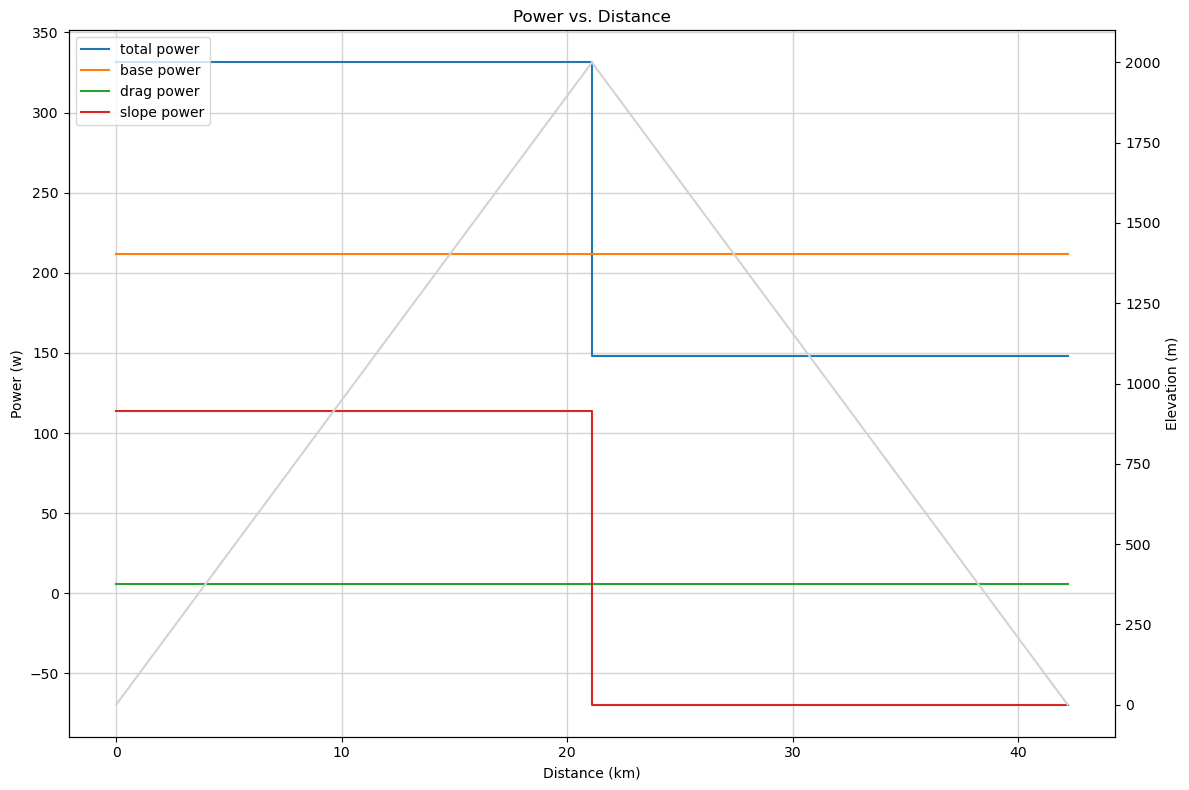

In [14]:
testCourse = bonk.readCourse('marathonUpDown.csv','UpDown Marathon')
environment = bonk.Environment(temperature = 5, humidity = 0, wind = 0, altitude = 0, body = 1)
athlete = bonk.Athlete(mass = 64, Ecor = 0.98, fatigueResistanceCoef = 0.07, Cd = 0.5, frontalArea = 0.5, vo2maxPower=5.42*64, glucoseConsumption = 60, startingGlycogen = 1500,temp=environment.temperature)
testPerformance = bonk.Performance(environment,athlete,testCourse)
raceTime, v, power = testPerformance.getEvenSplitRaceTime()

h, m, s = bonk.getTime(raceTime)
out = 'Race time: {:02d}:{:02d}:{:02d}'
print(out.format(int(h),int(m),int(s)))



testPerformance.plotPowerDistance()

#bostonPerformance.getMileSplitsV(relative = 0)
print('normalized power:',testPerformance.getNormalizedPower())

### Even Pace (ignoring normalized power effect)

In [15]:
testCourse = bonk.readCourse('marathonUpDown.csv','UpDown Marathon')
environment = bonk.Environment(temperature = 5, humidity = 0, wind = 0, altitude = 0, body = 1)
athlete = bonk.Athlete(mass = 64, Ecor = 0.98, fatigueResistanceCoef = 0.07, Cd = 0.5, frontalArea = 0.5, vo2maxPower=5.42*64, glucoseConsumption = 60, startingGlycogen = 1500,temp=environment.temperature)
testPerformance = bonk.Performance(environment,athlete,testCourse)
raceTime, v, power = testPerformance.getEvenSplitRaceTime(considerNormalizedPower=False)

h, m, s = bonk.getTime(raceTime)
out = 'Race time: {:02d}:{:02d}:{:02d}'
print(out.format(int(h),int(m),int(s)))



#testPerformance.plotPowerDistance()

#bostonPerformance.getMileSplitsV(relative = 0)
print('normalized power:',testPerformance.getNormalizedPower())

Race time: 02:56:44
normalized power: 334.4252977751362


### Even Power

- Choose a power
- Calculate speed per segment
- Calculate limit duration for that power from power-duration curve
- If estimated race time is longer than limit duration + tolerance
    - decrease power and repeat
- If estimated race time is shorter than limit duration - tolerance
    - increase power and repeat
- else: return speed

Race time: 02:59:23
normalized power 285.32675601654375


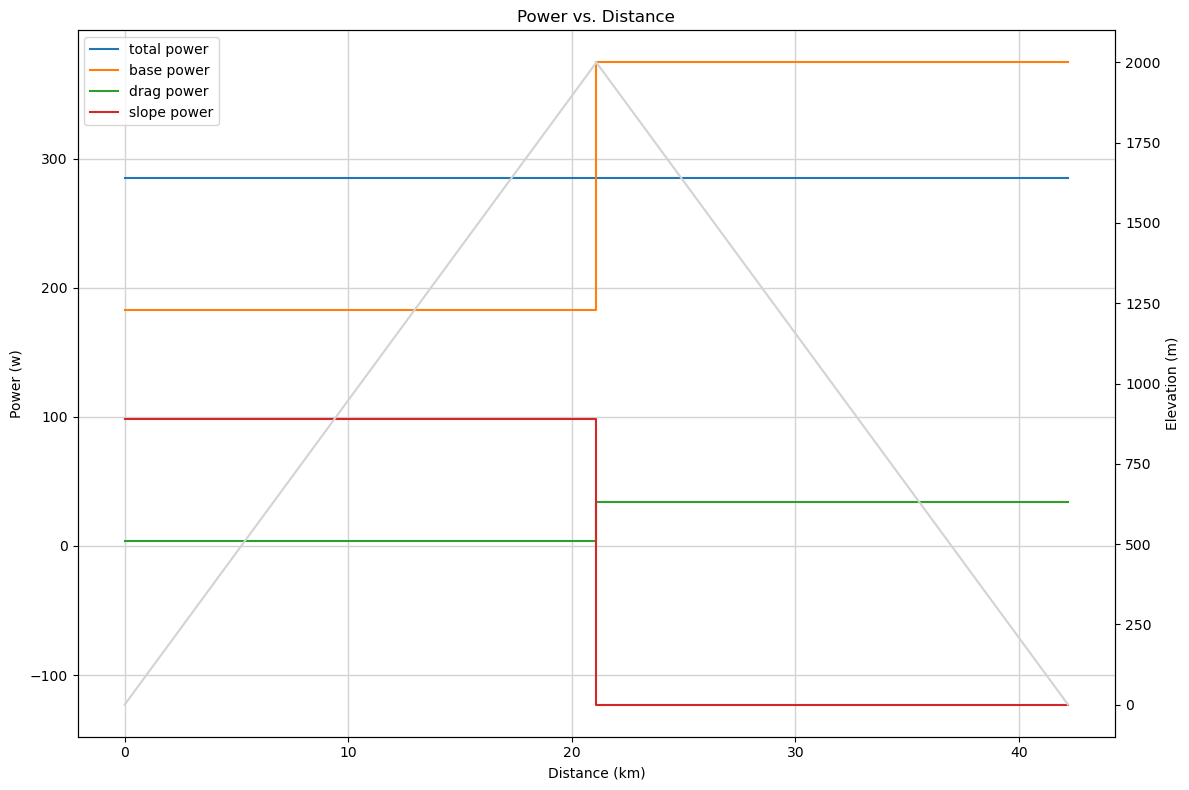

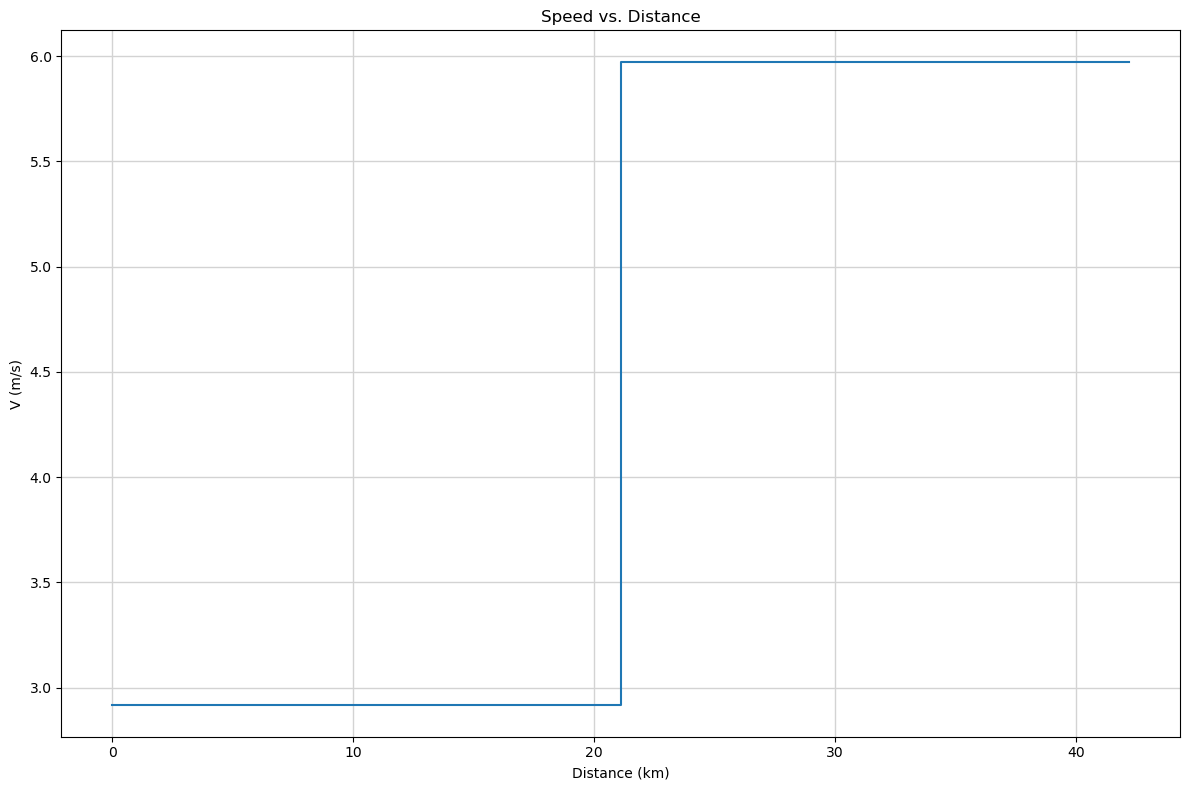

In [16]:
testCourse = bonk.readCourse('marathonUpDown.csv','UpDown Marathon')
testPerformance = bonk.Performance(environment,athlete,testCourse)
raceTime, power = testPerformance.getRaceTime()

h, m, s = bonk.getTime(raceTime)
out = 'Race time: {:02d}:{:02d}:{:02d}'
print(out.format(int(h),int(m),int(s)))



testPerformance.plotPowerDistance()
testPerformance.plotVDistance()

print('normalized power',testPerformance.getNormalizedPower())

### When to Push and When to Rest

- If there is no aerodynamic drag, there is no difference in time from even pace vs. even effort
- With aerodynamic drag, there is a benefit to an uneven power distribution (not considering fatigue effects)
    - Keeping average power constant, increased power during slow sections is beneficial
- Considering fatigue effects (normalized power), even pacing results in slower pace:
    - Optimal pacing is even power
- If you ran too slow at the beginning of the race or need to pass:
    - Increase effort during uphill or tailwind


## Example: Flat Marathon

Race time: 02:40:34


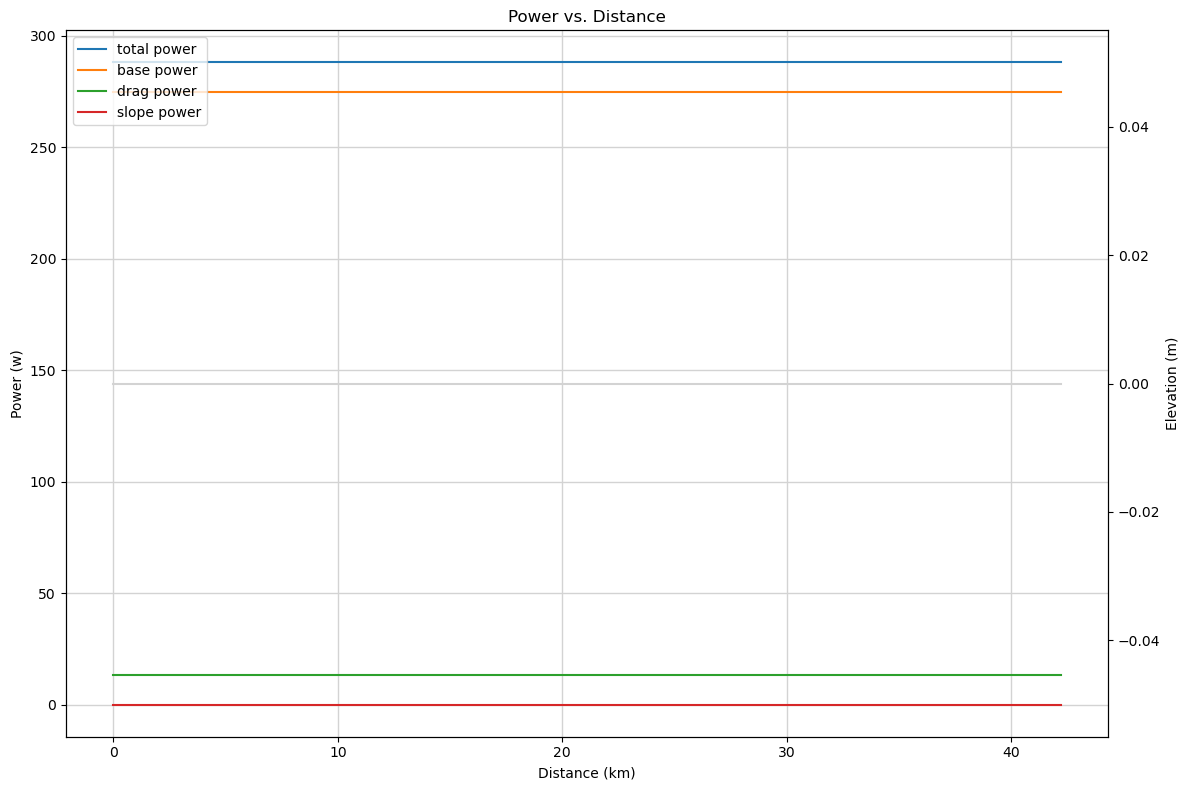

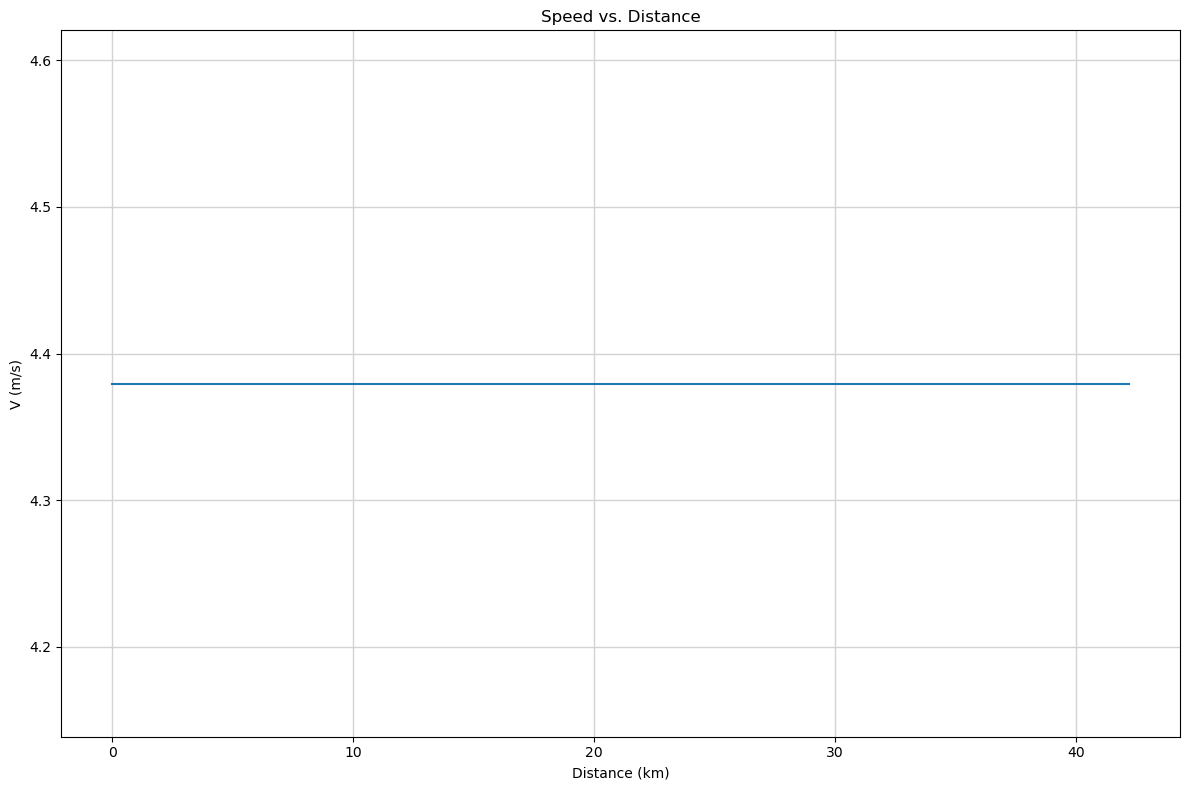

In [17]:
flatCourse = bonk.readCourse('flatMarathon.csv','flat')
environment = bonk.Environment(temperature = 5, humidity = 0, wind = 0, altitude = 0, body = 1)
athlete = bonk.Athlete(mass = 64, Ecor = 0.98, fatigueResistanceCoef = 0.07, Cd = 0.5, frontalArea = 0.5, vo2maxPower=347, glucoseConsumption = 60, startingGlycogen = 1500,temp=environment.temperature)
flatPerformance = bonk.Performance(environment,athlete,flatCourse)
raceTime, power = flatPerformance.getRaceTime()
h, m, s = bonk.getTime(raceTime)
out = 'Race time: {:02d}:{:02d}:{:02d}'
print(out.format(int(h),int(m),int(s)))

flatPerformance.plotPowerDistance()
flatPerformance.plotVDistance()

In [18]:
hotEnvironment = bonk.Environment(temperature = 30)
hotAthlete = bonk.Athlete(temp = hotEnvironment.temperature)
flatPerformance = bonk.Performance(environment,hotAthlete,flatCourse)
raceTimeHot, power = flatPerformance.getRaceTime()
h, m, s = bonk.getTime(raceTimeHot)
out = 'Race time: {:02d}:{:02d}:{:02d}'
print(out.format(int(h),int(m),int(s)))

print('Hot race time is ',raceTimeHot/raceTime*100.0, '% of optimal')

Race time: 03:09:28
Hot race time is  117.99783200327003 % of optimal


## Example: Boston Marathon

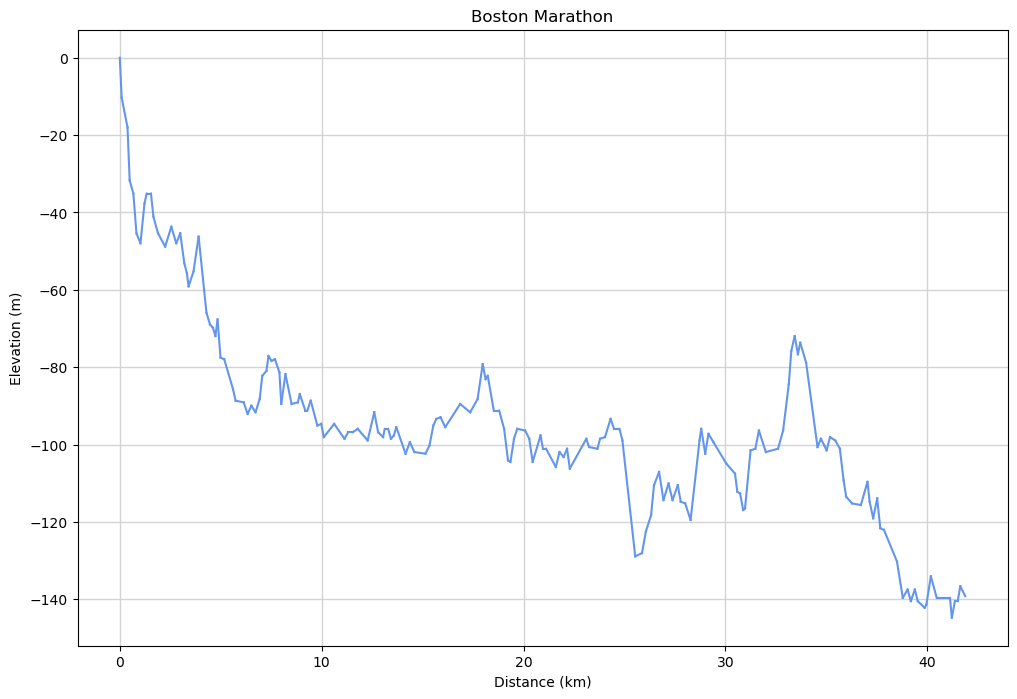

In [19]:
bostonCourse = bonk.readCourse('bostonCourse.csv','Boston Marathon')

bostonCourse.plotProfile()

#### Even Power

average power: 288.21823833041515
Race time: 02:38:19
Mile: 01 - 05:44
Mile: 02 - 05:55
Mile: 03 - 05:58
Mile: 04 - 05:49
Mile: 05 - 06:13
Mile: 06 - 06:04
Mile: 07 - 06:03
Mile: 08 - 06:08
Mile: 09 - 06:04
Mile: 10 - 06:12
Mile: 11 - 06:13
Mile: 12 - 05:55
Mile: 13 - 06:13
Mile: 14 - 06:04
Mile: 15 - 06:14
Mile: 16 - 05:42
Mile: 17 - 06:23
Mile: 18 - 06:22
Mile: 19 - 05:58
Mile: 20 - 06:19
Mile: 21 - 06:35
Mile: 22 - 05:48
Mile: 23 - 05:58
Mile: 24 - 05:48
Mile: 25 - 06:08
Mile: 26 - 06:05
normalized power: 288.21823833041526


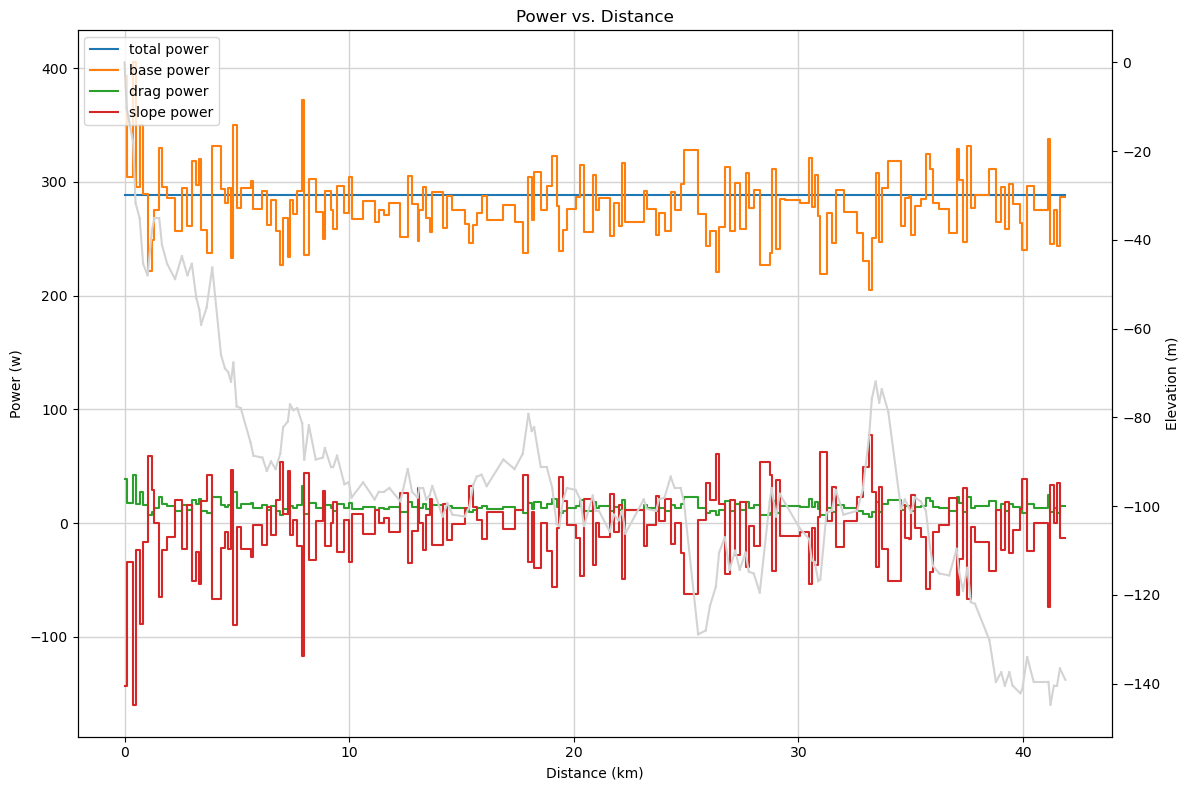

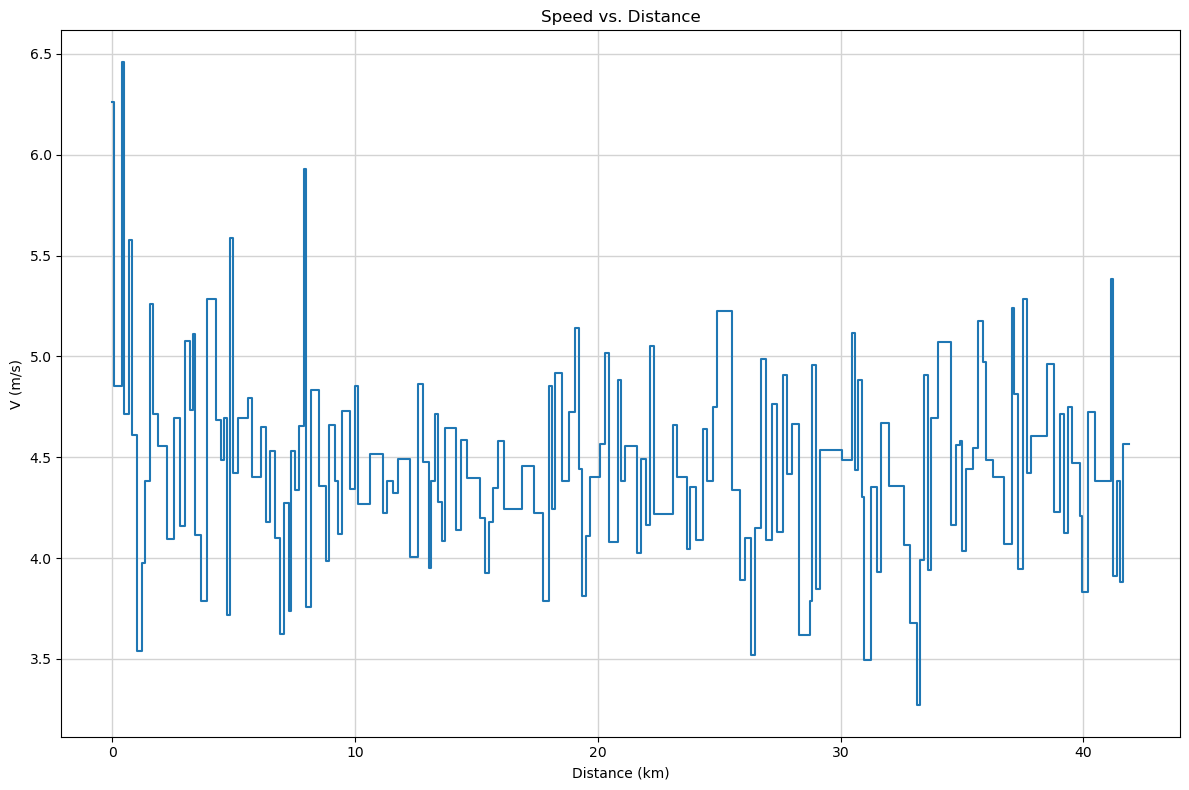

In [20]:
environment = bonk.Environment(temperature = 5, humidity = 0, wind = 0, altitude = 0, body = 1)
athlete = bonk.Athlete(mass = 64, Ecor = 0.98, fatigueResistanceCoef = 0.07, Cd = 0.5, frontalArea = 0.5, vo2maxPower=5.42*64, glucoseConsumption = 60, startingGlycogen = 1500,temp=environment.temperature)
bostonPerformance = bonk.Performance(environment,athlete,bostonCourse)
raceTime, power = bostonPerformance.getRaceTime()
print('average power:',bostonPerformance.averagePower)
h, m, s = bonk.getTime(raceTime)
out = 'Race time: {:02d}:{:02d}:{:02d}'
print(out.format(int(h),int(m),int(s)))



bostonPerformance.plotPowerDistance()
bostonPerformance.plotVDistance()

bostonPerformance.getMileSplits(relative = 0)
print('normalized power:',bostonPerformance.getNormalizedPower())

#### Even Pace

speed: 4.3474207102800095
average power: 283.4762646671525
Race time: 02:40:33
Mile: 01 - 06:10
Mile: 02 - 06:10
Mile: 03 - 06:10
Mile: 04 - 06:10
Mile: 05 - 06:10
Mile: 06 - 06:10
Mile: 07 - 06:10
Mile: 08 - 06:10
Mile: 09 - 06:10
Mile: 10 - 06:10
Mile: 11 - 06:10
Mile: 12 - 06:10
Mile: 13 - 06:10
Mile: 14 - 06:10
Mile: 15 - 06:10
Mile: 16 - 06:10
Mile: 17 - 06:10
Mile: 18 - 06:10
Mile: 19 - 06:10
Mile: 20 - 06:10
Mile: 21 - 06:10
Mile: 22 - 06:10
Mile: 23 - 06:10
Mile: 24 - 06:10
Mile: 25 - 06:10
Mile: 26 - 06:10
normalized power: 287.9058229501465


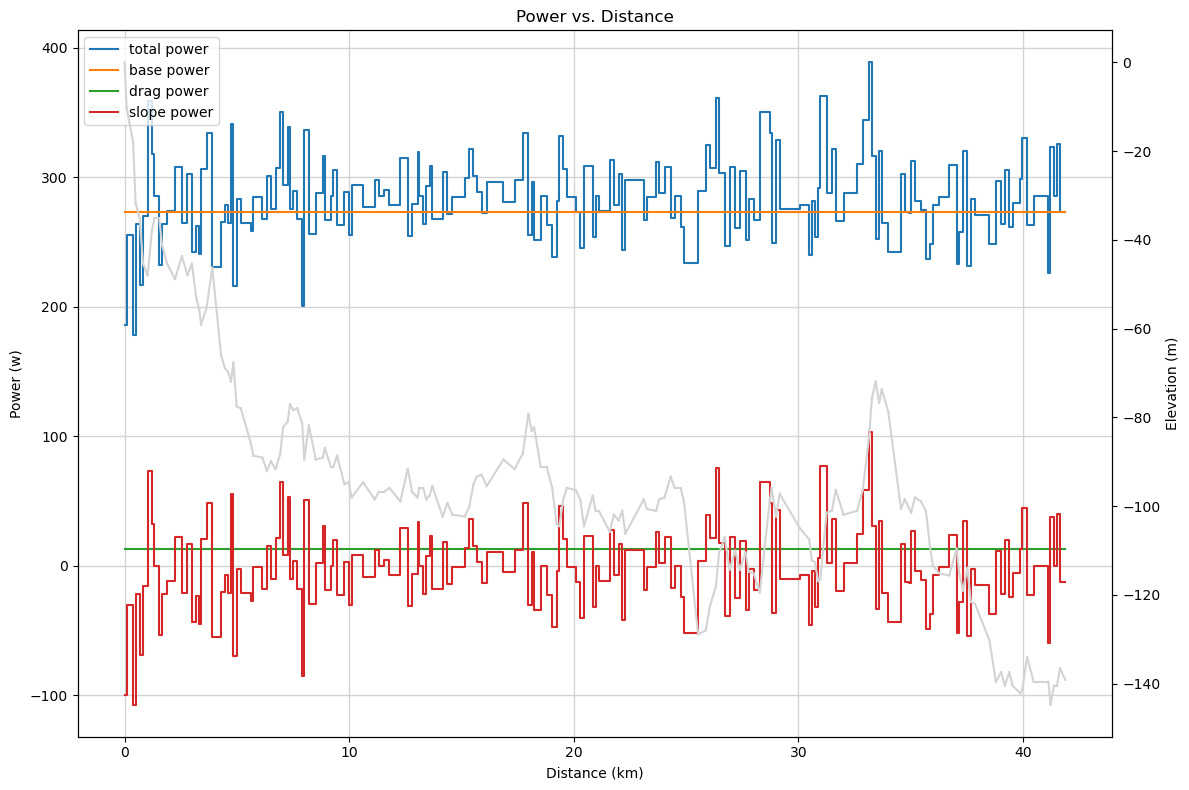

In [21]:
bostonPerformance = bonk.Performance(environment,athlete,bostonCourse)
raceTime, v, power = bostonPerformance.getEvenSplitRaceTime()
print('speed:',v)
print('average power:',bostonPerformance.averagePower)
h, m, s = bonk.getTime(raceTime)
out = 'Race time: {:02d}:{:02d}:{:02d}'
print(out.format(int(h),int(m),int(s)))

bostonPerformance.plotPowerDistance()

bostonPerformance.getMileSplitsV(relative = 0)
print('normalized power:',bostonPerformance.getNormalizedPower())

#### Even Pace (ignoring normalized power effect)

speed: 4.414182043956553
average power: 288.2392788365711
Race time: 02:38:08
Mile: 01 - 06:04
Mile: 02 - 06:04
Mile: 03 - 06:04
Mile: 04 - 06:04
Mile: 05 - 06:04
Mile: 06 - 06:04
Mile: 07 - 06:04
Mile: 08 - 06:04
Mile: 09 - 06:04
Mile: 10 - 06:04
Mile: 11 - 06:04
Mile: 12 - 06:04
Mile: 13 - 06:04
Mile: 14 - 06:04
Mile: 15 - 06:04
Mile: 16 - 06:04
Mile: 17 - 06:04
Mile: 18 - 06:04
Mile: 19 - 06:04
Mile: 20 - 06:04
Mile: 21 - 06:04
Mile: 22 - 06:04
Mile: 23 - 06:04
Mile: 24 - 06:04
Mile: 25 - 06:04
Mile: 26 - 06:04
normalized power: 292.730579747596


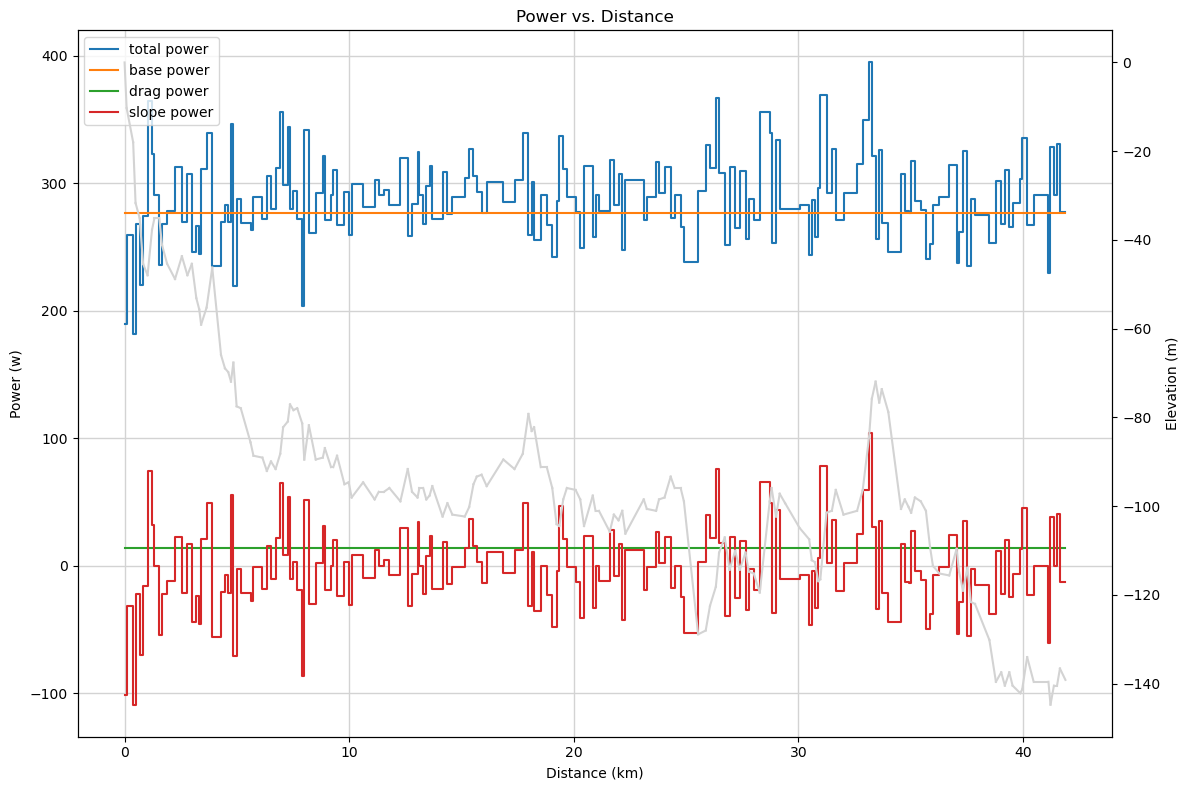

In [22]:
#environment = bonk.Environment(temperature = 5, humidity = 0, wind = 0, altitude = 0, body = 1)
#athlete = bonk.Athlete(mass = 64, Ecor = 0.98, fatigueResistanceCoef = 0.07, Cd = 0.5, frontalArea = 0.5, vo2maxPower=5.42*64, glucoseConsumption = 60, startingGlycogen = 1500,temp=environment.temperature)
bostonPerformance = bonk.Performance(environment,athlete,bostonCourse)
raceTime, v, power = bostonPerformance.getEvenSplitRaceTime(considerNormalizedPower=False)
print('speed:',v)
print('average power:',bostonPerformance.averagePower)
h, m, s = bonk.getTime(raceTime)
out = 'Race time: {:02d}:{:02d}:{:02d}'
print(out.format(int(h),int(m),int(s)))

bostonPerformance.plotPowerDistance()

bostonPerformance.getMileSplitsV(relative = 0)
print('normalized power:',bostonPerformance.getNormalizedPower())

## Example: Ouray 100M

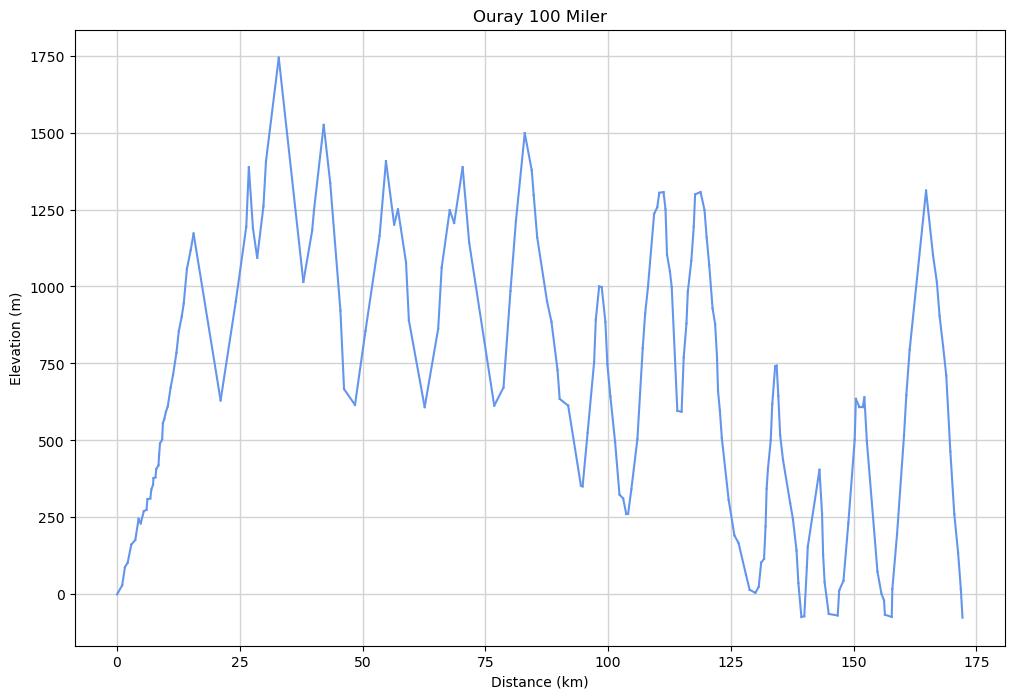

In [23]:
ourayCourse = bonk.readCourse('ourayCourse.csv','Ouray 100 Miler')

ourayCourse.plotProfile()

Race time: 30:53:51


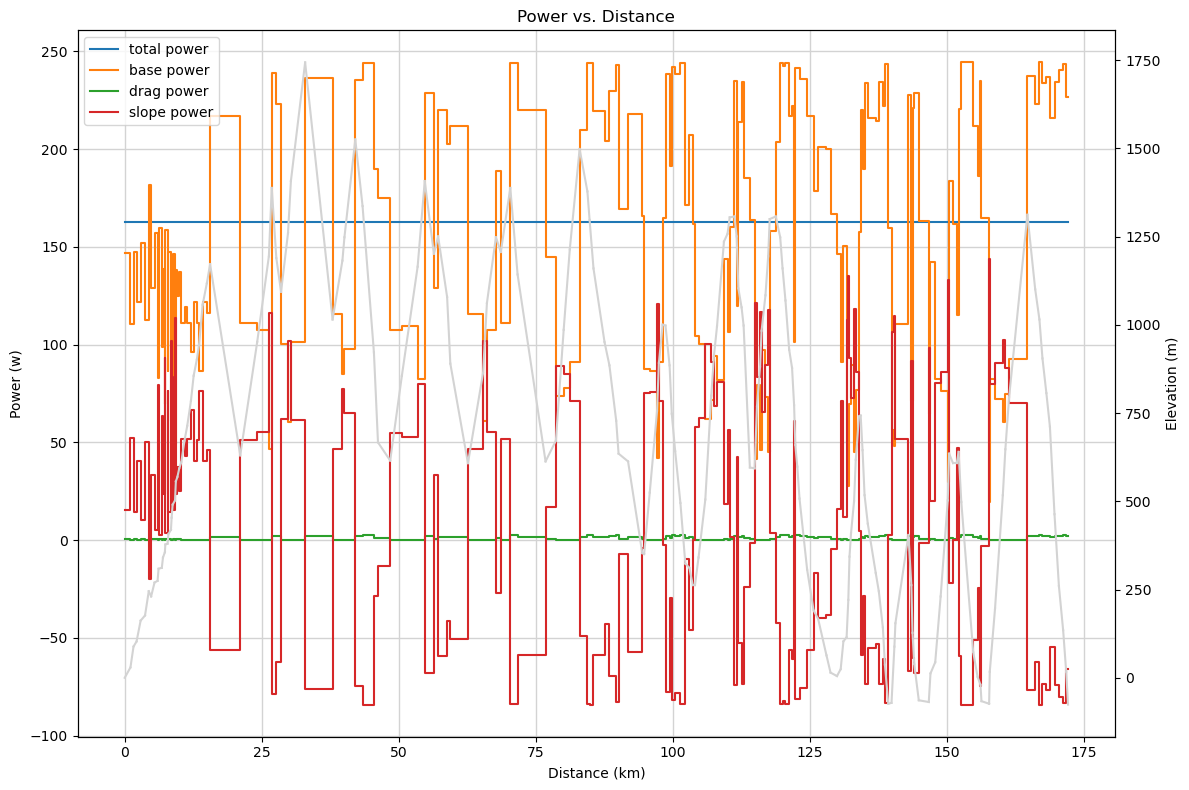

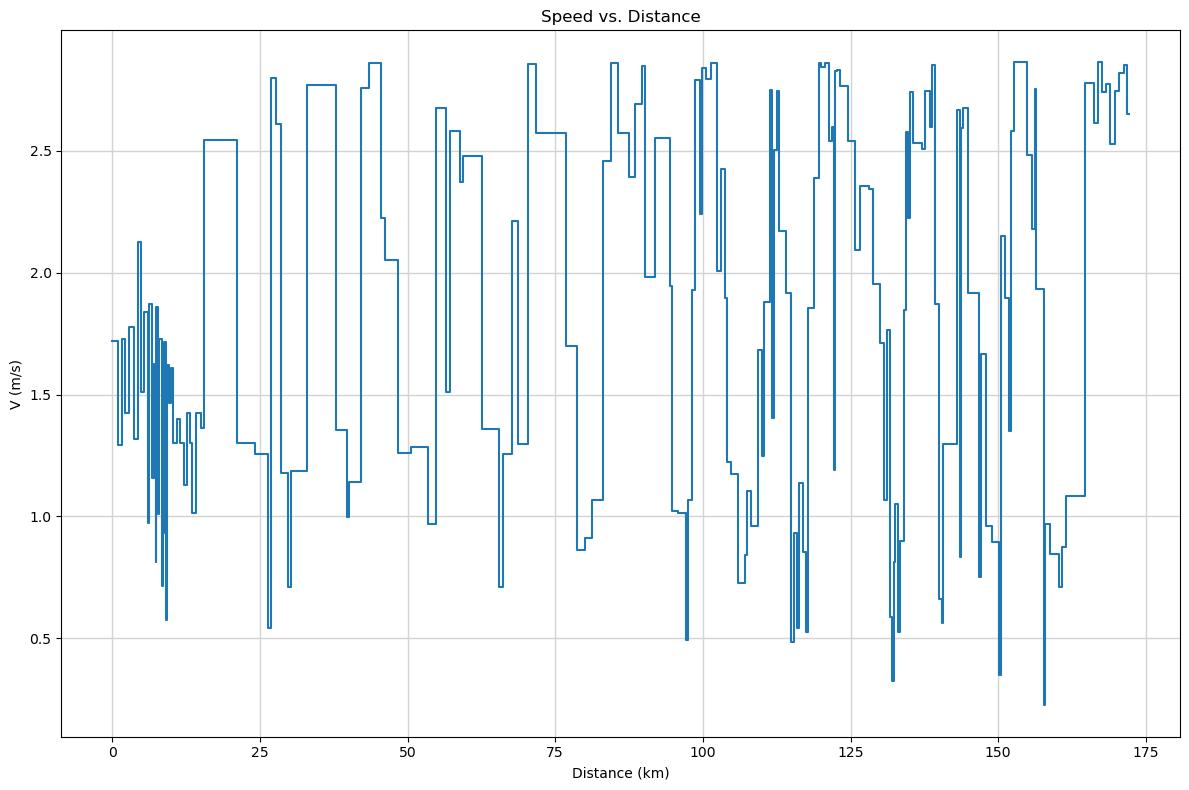

In [24]:
environment = bonk.Environment(temperature = 25, humidity = 0, wind = 0, altitude = 3000, body = 1)
athlete = bonk.Athlete(mass = 67, Ecor = 0.98*1.3, fatigueResistanceCoef = 0.07, Cd = 0.5, frontalArea = 0.5, vo2maxPower=347*0.95, glucoseConsumption = 60, startingGlycogen = 1500,temp=environment.temperature, altitude = environment.altitude)

ourayPerformance = bonk.Performance(environment,athlete,ourayCourse)
raceTime, power = ourayPerformance.getRaceTime()
h, m, s = bonk.getTime(raceTime)
out = 'Race time: {:02d}:{:02d}:{:02d}'
print(out.format(int(h),int(m),int(s)))

ourayPerformance.plotPowerDistance()
ourayPerformance.plotVDistance()

## World Record Prediction

Given typical values of the fastest distance runners and ideal flat race conditions, what do we expect race times to be?

In [25]:
fivek = bonk.readCourse('5k.csv','5k')
tenk = bonk.readCourse('10k.csv','10k')
half = bonk.readCourse('21k.csv','half marathon')
full = bonk.readCourse('flatMarathon.csv','full marathon')
environment = bonk.Environment(temperature = 5, humidity = 0, wind = 0, altitude = 0, body = 1)
eliteAthlete = bonk.Athlete(mass = 57, Ecor = 0.95, fatigueResistanceCoef = 0.07, Cd = 0.5, frontalArea = 0.5, vo2maxPower=6.35*57*1.13, glucoseConsumption = 80, startingGlycogen = 1500,temp=environment.temperature)

distances = [fivek, tenk, half, full]

for distance in distances:
    performance = bonk.Performance(environment,eliteAthlete,distance)
    raceTime, power = performance.getRaceTime()
    h, m, s = bonk.getTime(raceTime)
    out = '{} race time: {:02d}:{:02d}:{:02d}'
    print(out.format(distance.name,int(h),int(m),int(s)))


5k race time: 00:12:36
10k race time: 00:26:15
half marathon race time: 00:57:45
full marathon race time: 02:01:05


Real records

5k 	   0:12:35 	Joshua Cheptegei

10k	   0:26:11 	Joshua Cheptegei

Half   0:57:31     Jacob Kiplimo

Full   2:01:09	    Eliud Kipchoge

### Impact of high performance foams in running shoes

High performance foams have been shown to improve running economy by ~2% in elite runners.
- Better foams are softer with higher energy return (~87% vs ~60%)
    - Allows runner to maintain higher leg stiffness while maintaining same limiting ground contact force
    - Reduced mechanical work
- The impact is near zero in track events with low stack heights and cushioned surfaces

What would world records be before these foams were used (starting in 2017)?

In [26]:
fivek = bonk.readCourse('5k.csv','5k')
tenk = bonk.readCourse('10k.csv','10k')
half = bonk.readCourse('21k.csv','half marathon')
full = bonk.readCourse('flatMarathon.csv','full marathon')
environment = bonk.Environment(temperature = 5, humidity = 0, wind = 0, altitude = 0, body = 1)
eliteAthlete = bonk.Athlete(mass = 57, Ecor = 0.95*1.02, fatigueResistanceCoef = 0.07, Cd = 0.5, frontalArea = 0.5, vo2maxPower=6.35*57*1.13, glucoseConsumption = 80, startingGlycogen = 1500,temp=environment.temperature)

distances = [fivek, tenk, half, full]

for distance in distances:
    performance = bonk.Performance(environment,eliteAthlete,distance)
    raceTime, power = performance.getRaceTime()
    h, m, s = bonk.getTime(raceTime)
    out = '{} race time: {:02d}:{:02d}:{:02d}'
    print(out.format(distance.name,int(h),int(m),int(s)))

5k race time: 00:12:48
10k race time: 00:26:39
half marathon race time: 00:58:40
full marathon race time: 02:03:04


Real records before 2017

5k 0:12:37 Kenenisa Bekele

10k 0:26:17 Kenenisa Bekele

Half 0:58:23 Zersenay Tadese

Full 2:02:57 Dennis Kimetto



## Personal Records

The model predicts my own personal records within ~1%

In [27]:
fivek = bonk.readCourse('5k.csv','5k')
tenk = bonk.readCourse('10k.csv','10k')
half = bonk.readCourse('21k.csv','half marathon')
full = bonk.readCourse('flatMarathon.csv','full marathon')
environment = bonk.Environment(temperature = 5, humidity = 0, wind = 0, altitude = 0, body = 1)
jack = bonk.Athlete(mass = 63, Ecor = 0.98, fatigueResistanceCoef = 0.07, Cd = 0.5, frontalArea = 0.5, vo2maxPower=5.5*63, glucoseConsumption = 60, startingGlycogen = 1500,temp=environment.temperature)

distances = [fivek, tenk, half, full]

for distance in distances:
    performance = bonk.Performance(environment,jack,distance)
    raceTime, power = performance.getRaceTime()
    h, m, s = bonk.getTime(raceTime)
    out = '{} race time: {:02d}:{:02d}:{:02d}'
    print(out.format(distance.name,int(h),int(m),int(s)))

5k race time: 00:16:21
10k race time: 00:34:01
half marathon race time: 01:15:17
full marathon race time: 02:38:26


## Backup

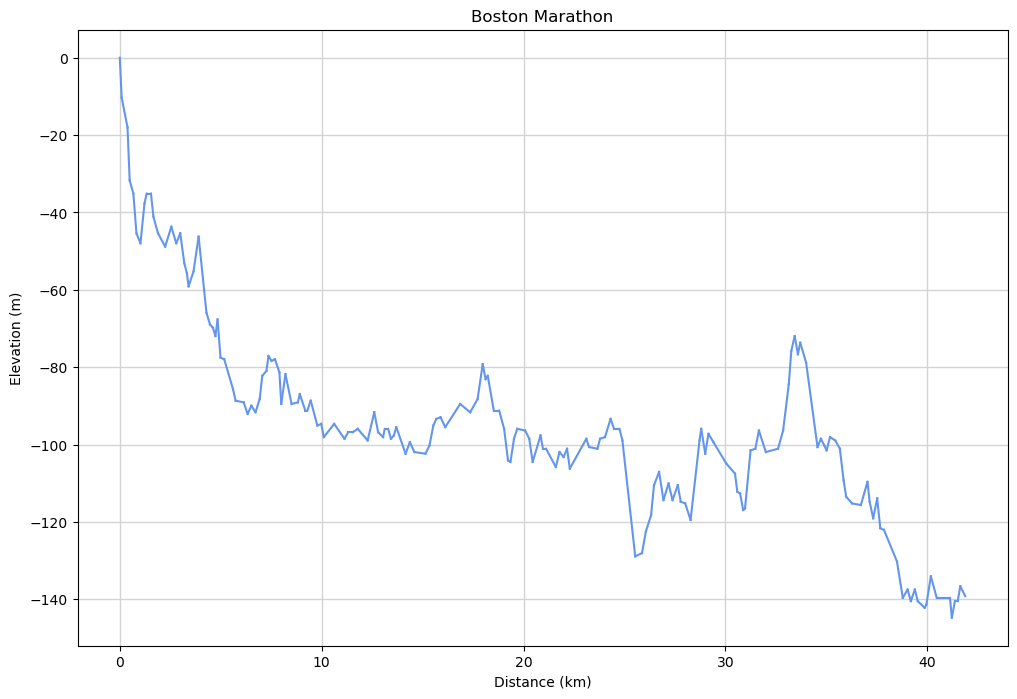

In [28]:
bostonCourse = bonk.readCourse('bostonCourse.csv','Boston Marathon')

bostonCourse.plotProfile()

### Even Power

Race time: 02:59:23
normalized power 285.32675601654375


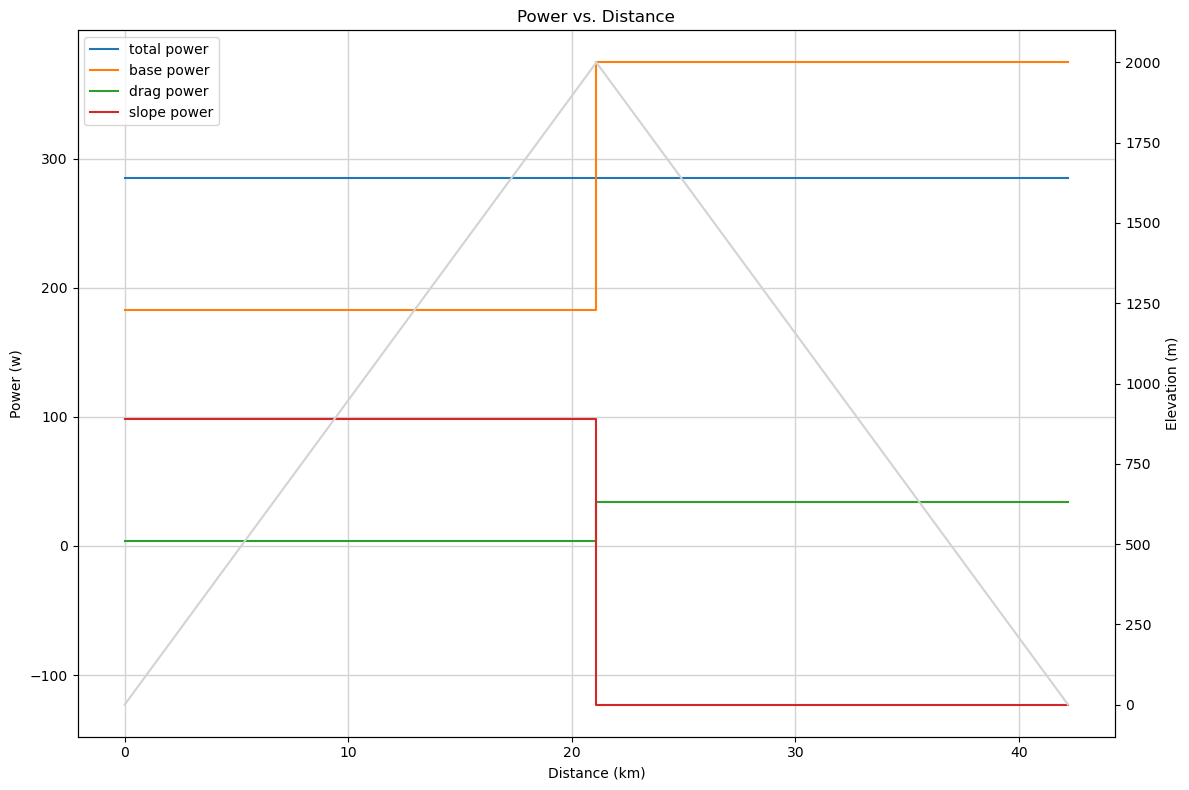

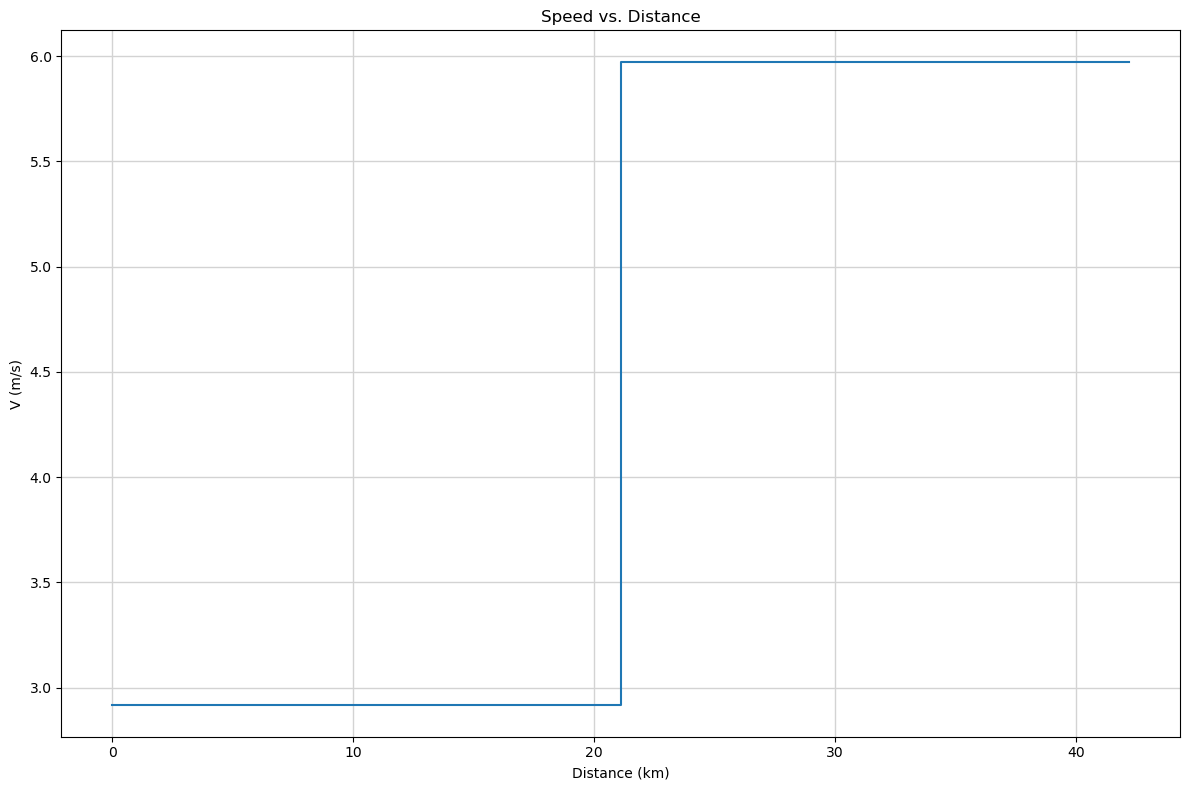

In [29]:
environment = bonk.Environment(temperature = 5, humidity = 0, wind = 0, altitude = 0, body = 1)
athlete = bonk.Athlete(mass = 64, Ecor = 0.98, fatigueResistanceCoef = 0.07, Cd = 0.5, frontalArea = 0.5, vo2maxPower=5.42*64, glucoseConsumption = 60, startingGlycogen = 1500,temp=environment.temperature)

testCourse = bonk.readCourse('marathonUpDown.csv','UpDown Marathon')
testPerformance = bonk.Performance(environment,athlete,testCourse)
raceTime, power = testPerformance.getRaceTime()

h, m, s = bonk.getTime(raceTime)
out = 'Race time: {:02d}:{:02d}:{:02d}'
print(out.format(int(h),int(m),int(s)))



testPerformance.plotPowerDistance()
testPerformance.plotVDistance()

print('normalized power',testPerformance.getNormalizedPower())

### Optimization

Race time: 02:59:38
average power 283.4834687777954
normalized power 285.2905323723979


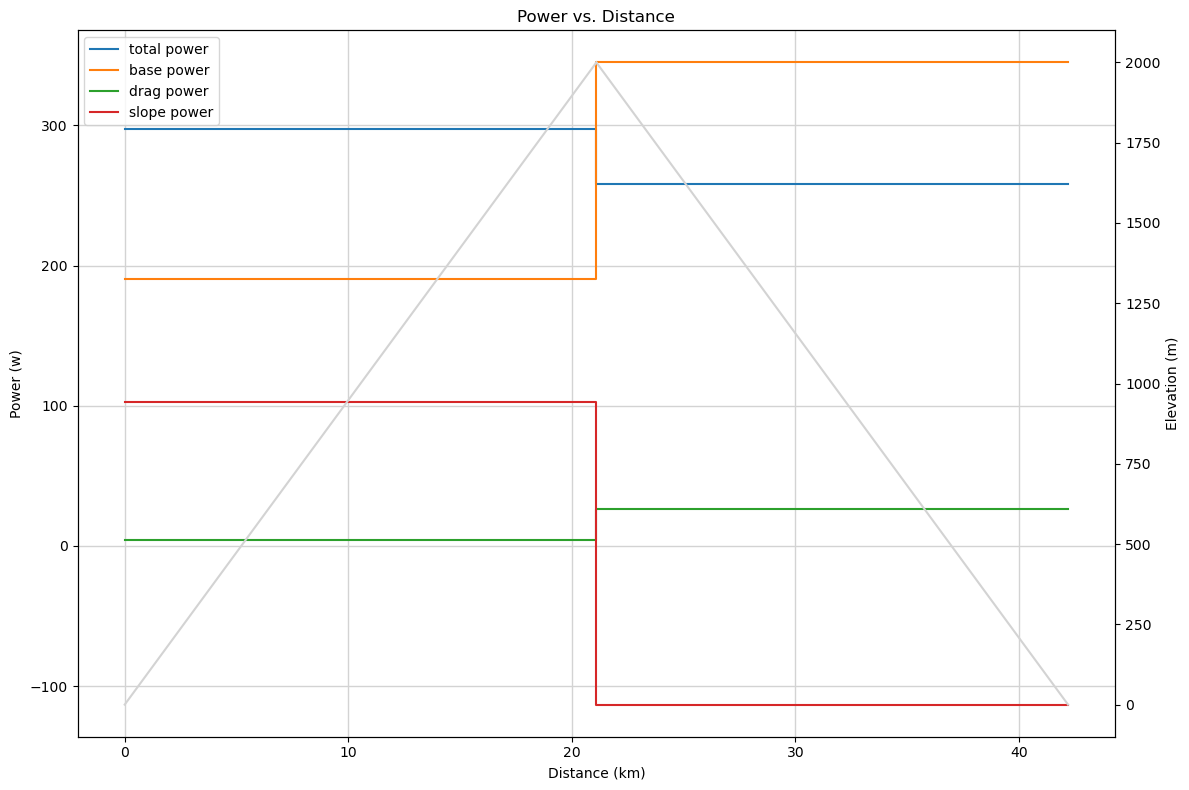

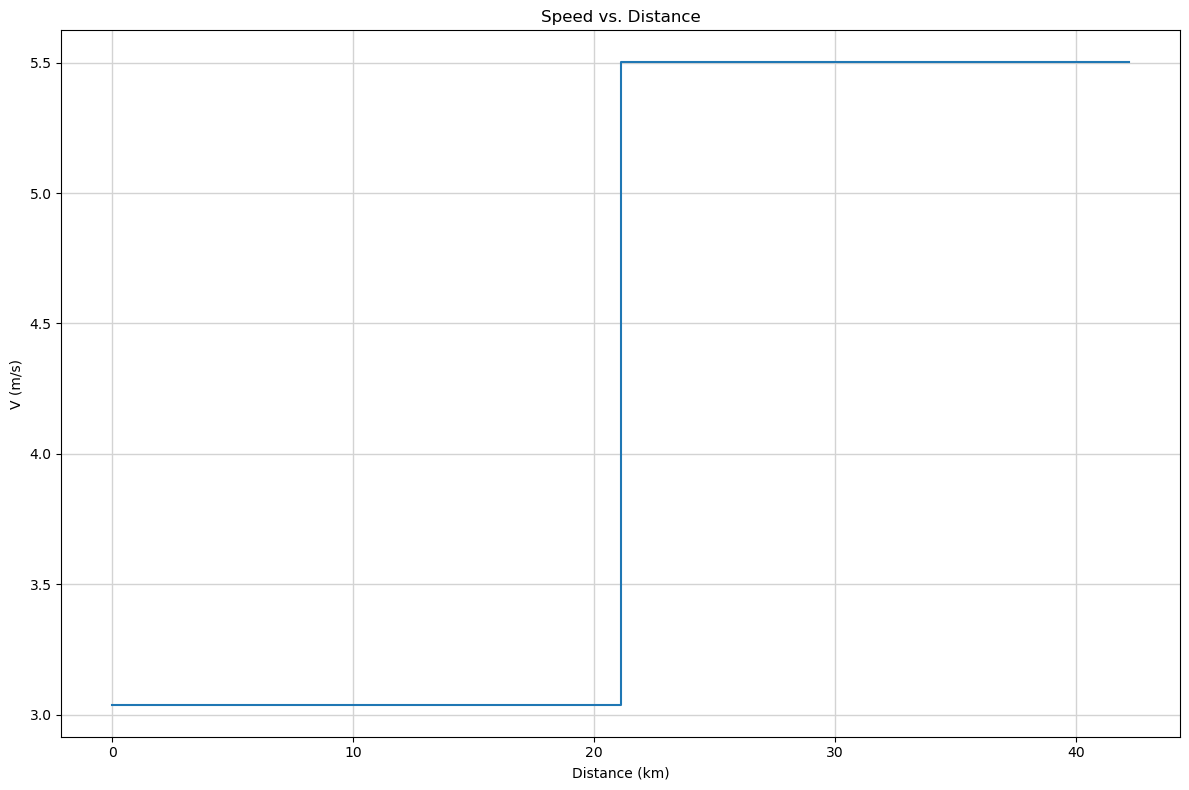

In [30]:
environment = bonk.Environment(temperature = 5, humidity = 0, wind = 0, altitude = 0, body = 1)
athlete = bonk.Athlete(mass = 64, Ecor = 0.98, fatigueResistanceCoef = 0.07, Cd = 0.5, frontalArea = 0.5, vo2maxPower=5.42*64, glucoseConsumption = 60, startingGlycogen = 1500,temp=environment.temperature)
considerNormalizedPower = TrueconsiderNormalizedPower = True
testCourse = bonk.readCourse('marathonUpDown.csv','UpDown Marathon')
testPerformance = bonk.Performance(environment,athlete,testCourse)
raceTime, power = testPerformance.getOptimalRaceTime(considerNormalizedPower=True)

h, m, s = bonk.getTime(raceTime)
out = 'Race time: {:02d}:{:02d}:{:02d}'
print(out.format(int(h),int(m),int(s)))



testPerformance.plotPowerDistance()
testPerformance.plotVDistance()
print('average power',testPerformance.averagePower)
print('normalized power',testPerformance.getNormalizedPower())

Race time: 02:31:40
normalized power 289.12759432568816


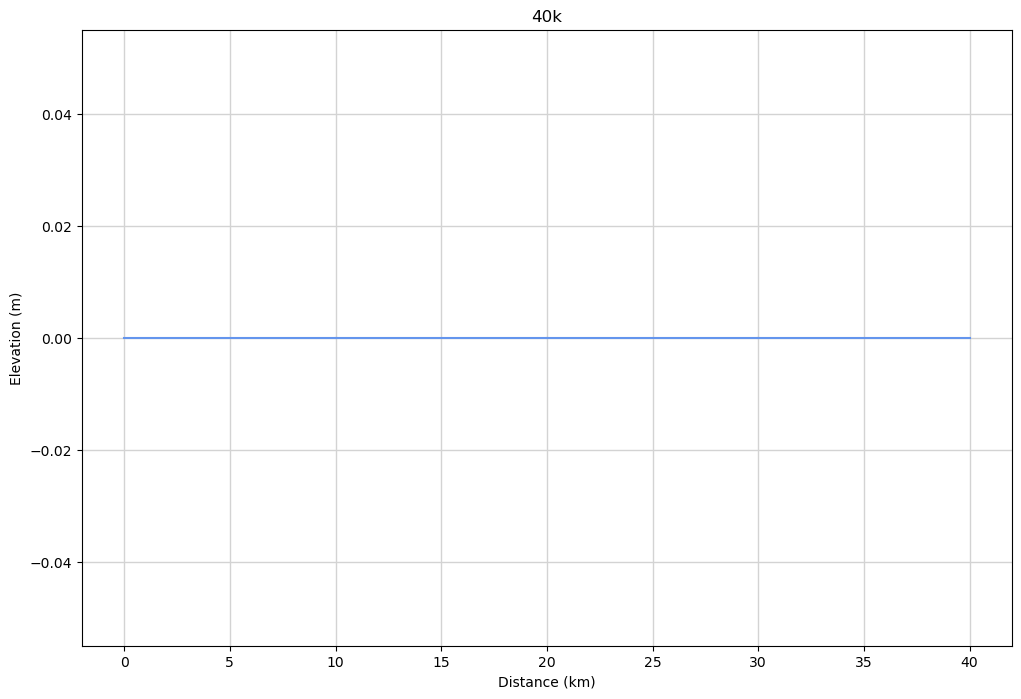

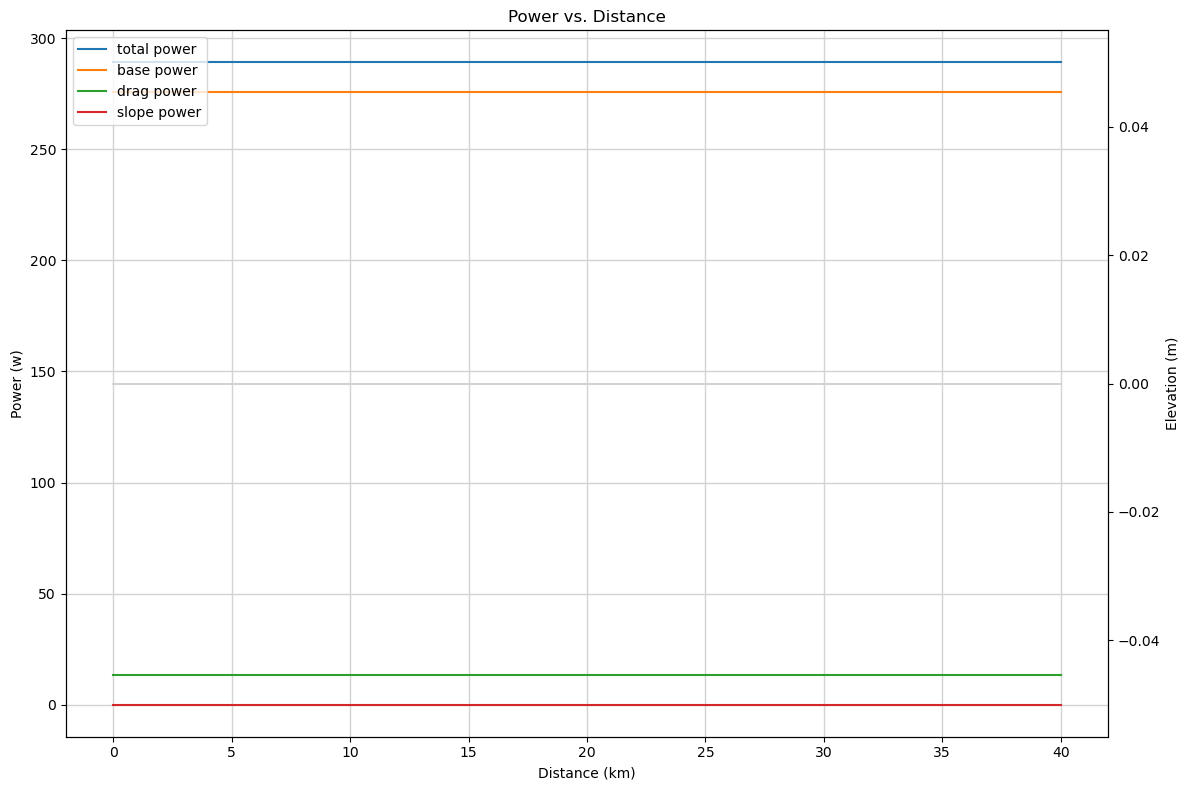

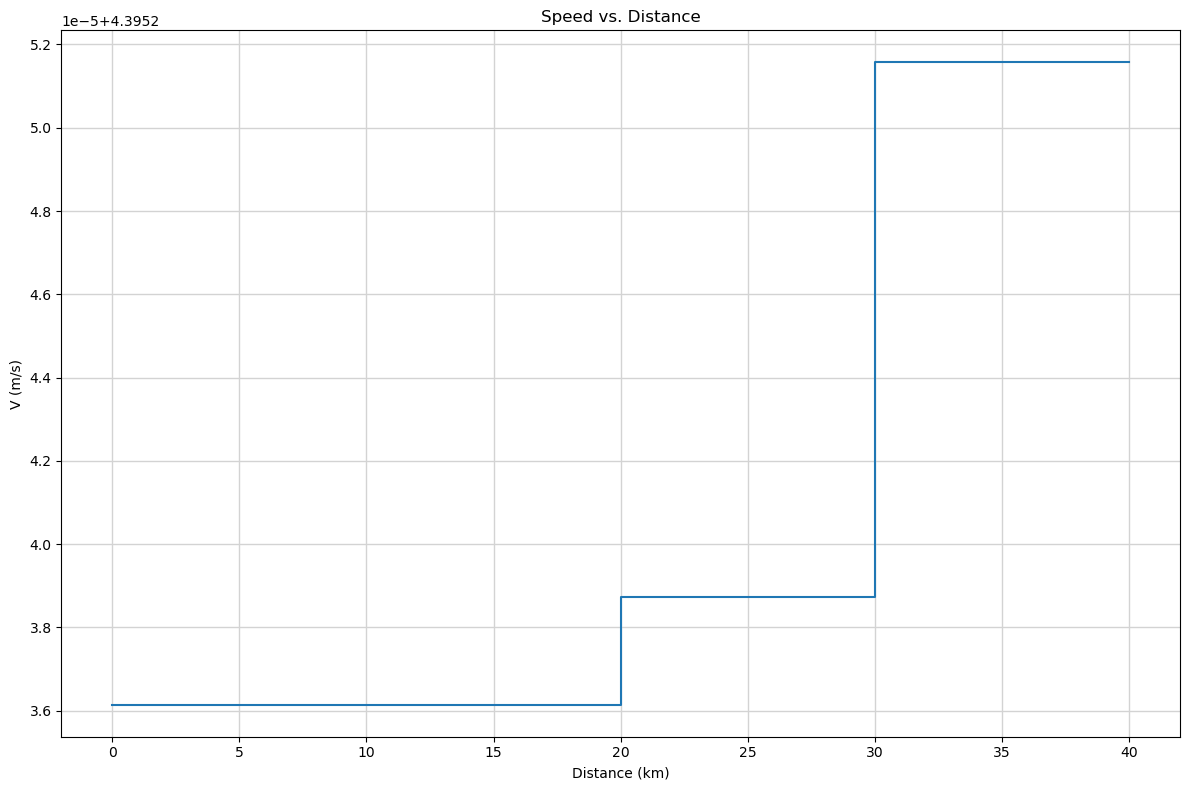

In [31]:
fortyKFlatCourse = bonk.readCourse('40k_segments.csv','40k')

fortyKFlatCourse.plotProfile()

environment = bonk.Environment(temperature = 5, humidity = 0, wind = 0, altitude = 0, body = 1)
athlete = bonk.Athlete(mass = 64, Ecor = 0.98, fatigueResistanceCoef = 0.07, Cd = 0.5, frontalArea = 0.5, vo2maxPower=5.42*64, glucoseConsumption = 60, startingGlycogen = 1500,temp=environment.temperature)
considerNormalizedPower = TrueconsiderNormalizedPower = True

testPerformance = bonk.Performance(environment,athlete,fortyKFlatCourse)
raceTime, power = testPerformance.getOptimalRaceTime(considerNormalizedPower=True)

h, m, s = bonk.getTime(raceTime)
out = 'Race time: {:02d}:{:02d}:{:02d}'
print(out.format(int(h),int(m),int(s)))



testPerformance.plotPowerDistance()
testPerformance.plotVDistance()

print('normalized power',testPerformance.getNormalizedPower())

### Boston Prediction

- Use constant power
- Estimate vo2max from Rock CF race
- Calculate Boston time and pacing
- Update as weather prediction improves

#### Jack

##### Jack - Half

In [32]:
rockCFCourse = bonk.readCourse('rockCF.csv','Rock CF')
environment = bonk.Environment(temperature = -2, humidity = 0, wind = 0, altitude = 0, body = 1)
Jack = bonk.Athlete(mass = 64, Ecor = 0.98, fatigueResistanceCoef = 0.07, Cd = 0.5, frontalArea = 0.5, vo2maxPower=5.42*64*0.97, glucoseConsumption = 60, startingGlycogen = 1500,temp=environment.temperature)
rockCFPerformance = bonk.Performance(environment,Jack,rockCFCourse)
raceTime, power = rockCFPerformance.getRaceTime()
print('average power:',rockCFPerformance.averagePower)
h, m, s = bonk.getTime(raceTime)
out = 'Race time: {:02d}:{:02d}:{:02d}'
print(out.format(int(h),int(m),int(s)))



#rockCFPerformance.plotPowerDistance()
#rockCFPerformance.plotVDistance()

rockCFPerformance.getMileSplits(relative = 0)
print('normalized power:',rockCFPerformance.getNormalizedPower())

average power: 287.0105576993987
Race time: 01:20:38
Mile: 01 - 80:38
Mile: 02 - 00:00
Mile: 03 - 00:00
Mile: 04 - 00:00
Mile: 05 - 00:00
Mile: 06 - 00:00
Mile: 07 - 00:00
Mile: 08 - 00:00
Mile: 09 - 00:00
Mile: 10 - 00:00
Mile: 11 - 00:00
Mile: 12 - 00:00
Mile: 13 - 00:00
normalized power: 287.0105576993987


##### Jack - Boston

In [33]:
environment = bonk.Environment(temperature = 10, humidity = 0, wind = 1, altitude = 0, body = 1)
bostonPerformance = bonk.Performance(environment,Jack,bostonCourse)
raceTime, power = bostonPerformance.getRaceTime()
print('average power:',bostonPerformance.averagePower)
h, m, s = bonk.getTime(raceTime)
out = 'Race time: {:02d}:{:02d}:{:02d}'
print(out.format(int(h),int(m),int(s)))



#bostonPerformance.plotPowerDistance()
#bostonPerformance.plotVDistance()

bostonPerformance.getMileSplits(relative = 0)
print('normalized power:',bostonPerformance.getNormalizedPower())

average power: 272.3733633048467
Race time: 02:50:01
Mile: 01 - 06:10
Mile: 02 - 06:21
Mile: 03 - 06:25
Mile: 04 - 06:15
Mile: 05 - 06:41
Mile: 06 - 06:31
Mile: 07 - 06:30
Mile: 08 - 06:35
Mile: 09 - 06:31
Mile: 10 - 06:40
Mile: 11 - 06:40
Mile: 12 - 06:22
Mile: 13 - 06:40
Mile: 14 - 06:31
Mile: 15 - 06:42
Mile: 16 - 06:08
Mile: 17 - 06:51
Mile: 18 - 06:50
Mile: 19 - 06:25
Mile: 20 - 06:47
Mile: 21 - 07:04
Mile: 22 - 06:14
Mile: 23 - 06:25
Mile: 24 - 06:14
Mile: 25 - 06:35
Mile: 26 - 06:32
normalized power: 272.3733633048468


#### McBride

##### McBride - Half

In [34]:
rockCFCourse = bonk.readCourse('rockCF.csv','Rock CF')
environment = bonk.Environment(temperature = -2, humidity = 0, wind = 0, altitude = 0, body = 1)
McBride = bonk.Athlete(mass = 64, Ecor = 0.98, fatigueResistanceCoef = 0.07, Cd = 0.5, frontalArea = 0.5, vo2maxPower=5.42*64*1, glucoseConsumption = 60, startingGlycogen = 1500,temp=environment.temperature)
rockCFPerformance = bonk.Performance(environment,McBride,rockCFCourse)
raceTime, power = rockCFPerformance.getRaceTime()
print('average power:',rockCFPerformance.averagePower)
h, m, s = bonk.getTime(raceTime)
out = 'Race time: {:02d}:{:02d}:{:02d}'
print(out.format(int(h),int(m),int(s)))



#rockCFPerformance.plotPowerDistance()
#rockCFPerformance.plotVDistance()

rockCFPerformance.getMileSplits(relative = 0)
print('normalized power:',rockCFPerformance.getNormalizedPower())

average power: 296.5554555128502
Race time: 01:18:16
Mile: 01 - 78:16
Mile: 02 - 00:00
Mile: 03 - 00:00
Mile: 04 - 00:00
Mile: 05 - 00:00
Mile: 06 - 00:00
Mile: 07 - 00:00
Mile: 08 - 00:00
Mile: 09 - 00:00
Mile: 10 - 00:00
Mile: 11 - 00:00
Mile: 12 - 00:00
Mile: 13 - 00:00
normalized power: 296.5554555128502


##### McBride - Boston

In [35]:
environment = bonk.Environment(temperature = 10, humidity = 0, wind = 1, altitude = 0, body = 1)
bostonPerformance = bonk.Performance(environment,McBride,bostonCourse)
raceTime, power = bostonPerformance.getRaceTime()
print('average power:',bostonPerformance.averagePower)
h, m, s = bonk.getTime(raceTime)
out = 'Race time: {:02d}:{:02d}:{:02d}'
print(out.format(int(h),int(m),int(s)))



#bostonPerformance.plotPowerDistance()
#bostonPerformance.plotVDistance()

bostonPerformance.getMileSplits(relative = 0)
print('normalized power:',bostonPerformance.getNormalizedPower())

average power: 280.7241616751505
Race time: 02:45:25
Mile: 01 - 06:00
Mile: 02 - 06:11
Mile: 03 - 06:14
Mile: 04 - 06:05
Mile: 05 - 06:30
Mile: 06 - 06:21
Mile: 07 - 06:19
Mile: 08 - 06:24
Mile: 09 - 06:21
Mile: 10 - 06:29
Mile: 11 - 06:30
Mile: 12 - 06:12
Mile: 13 - 06:29
Mile: 14 - 06:20
Mile: 15 - 06:31
Mile: 16 - 05:58
Mile: 17 - 06:40
Mile: 18 - 06:39
Mile: 19 - 06:15
Mile: 20 - 06:35
Mile: 21 - 06:52
Mile: 22 - 06:04
Mile: 23 - 06:14
Mile: 24 - 06:04
Mile: 25 - 06:24
Mile: 26 - 06:21
normalized power: 280.7241616751507


#### Mikel

##### Mikel - Half

In [36]:
rockCFCourse = bonk.readCourse('rockCF.csv','Rock CF')
environment = bonk.Environment(temperature = -2, humidity = 0, wind = 0, altitude = 0, body = 1)
Mikel = bonk.Athlete(mass = 64, Ecor = 0.98, fatigueResistanceCoef = 0.07, Cd = 0.5, frontalArea = 0.5, vo2maxPower=5.42*64*0.95, glucoseConsumption = 60, startingGlycogen = 1500,temp=environment.temperature)
rockCFPerformance = bonk.Performance(environment,Mikel,rockCFCourse)
raceTime, power = rockCFPerformance.getRaceTime()
print('average power:',rockCFPerformance.averagePower)
h, m, s = bonk.getTime(raceTime)
out = 'Race time: {:02d}:{:02d}:{:02d}'
print(out.format(int(h),int(m),int(s)))



##rockCFPerformance.plotPowerDistance()
#rockCFPerformance.plotVDistance()

rockCFPerformance.getMileSplits(relative = 0)
print('normalized power:',rockCFPerformance.getNormalizedPower())

average power: 280.6449131315667
Race time: 01:22:18
Mile: 01 - 82:18
Mile: 02 - 00:00
Mile: 03 - 00:00
Mile: 04 - 00:00
Mile: 05 - 00:00
Mile: 06 - 00:00
Mile: 07 - 00:00
Mile: 08 - 00:00
Mile: 09 - 00:00
Mile: 10 - 00:00
Mile: 11 - 00:00
Mile: 12 - 00:00
Mile: 13 - 00:00
normalized power: 280.6449131315667


##### Mikel - Boston

In [37]:
environment = bonk.Environment(temperature = 10, humidity = 0, wind = 1, altitude = 0, body = 1)
bostonPerformance = bonk.Performance(environment,Mikel,bostonCourse)
raceTime, power = bostonPerformance.getRaceTime()
print('average power:',bostonPerformance.averagePower)
h, m, s = bonk.getTime(raceTime)
out = 'Race time: {:02d}:{:02d}:{:02d}'
print(out.format(int(h),int(m),int(s)))



#bostonPerformance.plotPowerDistance()
#bostonPerformance.plotVDistance()

bostonPerformance.getMileSplits(relative = 1)
print('normalized power:',bostonPerformance.getNormalizedPower())

average power: 266.8127780955491
Race time: 02:53:14
Mile: 01 - 0.95
Mile: 02 - 0.97
Mile: 03 - 0.98
Mile: 04 - 0.96
Mile: 05 - 1.02
Mile: 06 - 1.00
Mile: 07 - 1.00
Mile: 08 - 1.01
Mile: 09 - 1.00
Mile: 10 - 1.02
Mile: 11 - 1.02
Mile: 12 - 0.98
Mile: 13 - 1.02
Mile: 14 - 1.00
Mile: 15 - 1.03
Mile: 16 - 0.94
Mile: 17 - 1.05
Mile: 18 - 1.05
Mile: 19 - 0.98
Mile: 20 - 1.04
Mile: 21 - 1.08
Mile: 22 - 0.96
Mile: 23 - 0.98
Mile: 24 - 0.96
Mile: 25 - 1.01
Mile: 26 - 1.00
normalized power: 266.8127780955492


In [38]:
flatCourse = bonk.readCourse('flatMarathon.csv','flatMarathon')
Mikel = bonk.Athlete(mass = 64, Ecor = 0.98, fatigueResistanceCoef = 0.07, Cd = 0.5, frontalArea = 0.5, vo2maxPower=5.42*64*0.97, glucoseConsumption = 60, startingGlycogen = 1500,temp=environment.temperature)
environment = bonk.Environment(temperature = 5, humidity = 0, wind = 1, altitude = 0, body = 1)
bostonPerformance = bonk.Performance(environment,Mikel,flatCourse)
raceTime, power = bostonPerformance.getRaceTime()
print('average power:',bostonPerformance.averagePower)
h, m, s = bonk.getTime(raceTime)
out = 'Race time: {:02d}:{:02d}:{:02d}'
print(out.format(int(h),int(m),int(s)))



#bostonPerformance.plotPowerDistance()
#bostonPerformance.plotVDistance()

bostonPerformance.getMileSplits(relative = 0)
print('normalized power:',bostonPerformance.getNormalizedPower())

average power: 273.9845878096475
Race time: 02:51:34
Mile: 01 - 171:34
Mile: 02 - 00:00
Mile: 03 - 00:00
Mile: 04 - 00:00
Mile: 05 - 00:00
Mile: 06 - 00:00
Mile: 07 - 00:00
Mile: 08 - 00:00
Mile: 09 - 00:00
Mile: 10 - 00:00
Mile: 11 - 00:00
Mile: 12 - 00:00
Mile: 13 - 00:00
Mile: 14 - 00:00
Mile: 15 - 00:00
Mile: 16 - 00:00
Mile: 17 - 00:00
Mile: 18 - 00:00
Mile: 19 - 00:00
Mile: 20 - 00:00
Mile: 21 - 00:00
Mile: 22 - 00:00
Mile: 23 - 00:00
Mile: 24 - 00:00
Mile: 25 - 00:00
Mile: 26 - 00:00
normalized power: 273.9845878096475
